#LIBRERIAS

In [2]:
# Manejo de archivos y operaciones matemáticas
import math

import os

# Manipulación y análisis de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx

# Estadística y análisis de datos
from scipy.stats import chi2_contingency

# Machine Learning - Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Machine Learning - Modelado y Algoritmos
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
from xgboost import XGBRegressor
!pip install xgboost lightgbm
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras

# Machine Learning - Evaluación de modelos
from sklearn.metrics import (accuracy_score, classification_report, mean_absolute_error,
                             mean_squared_error, r2_score)

# Machine Learning - Validación y Optimización
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV,
                                     cross_val_score)

ModuleNotFoundError: No module named 'imblearn'

# IMPORTACIÓN DE DATOS

Importamos el DATASET

In [ ]:
!wget  https://github.com/pablolube/No-Country/raw/refs/heads/main/data/raw/HDHI%20Admission%20data.csv
df = pd.read_csv('HDHI Admission data.csv')
df

--2025-02-05 15:02:13--  https://github.com/pablolube/No-Country/raw/refs/heads/main/data/raw/HDHI%20Admission%20data.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pablolube/No-Country/refs/heads/main/data/raw/HDHI%20Admission%20data.csv [following]
--2025-02-05 15:02:13--  https://raw.githubusercontent.com/pablolube/No-Country/refs/heads/main/data/raw/HDHI%20Admission%20data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2600930 (2.5M) [text/plain]
Saving to: ‘HDHI Admission data.csv.2’

HDHI Admission data 100%[===================>]   2.48M  --.-KB/s    in 0.08s   

2025-02-05 15:02

SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0          1  234735    4/1/2017    4/3/2017   81      M     R   
1          2  234696    4/1/2017    4/5/2017   65      M     R   
2          3  234882    4/1/2017    4/3/2017   53      M     U   
3          4  234635    4/1/2017    4/8/2017   67      F     U   
4          5  234486    4/1/2017   4/23/2017   60      F     U   
...      ...     ...         ...         ...  ...    ...   ...   
15752  15753  699585  31/03/2019  04/04/2019   86      F     U   
15753  15754  699500   3/31/2019    4/1/2019   50      M     R   
15754  15755  700415  31/03/2019  09/04/2019   82      M     U   
15755  15756  699524  31/03/2019  03/04/2019   59      F     U   
15756  15757  699524  31/03/2019  03/04/2019   59      F     U   

      TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                                   E     Apr-17                 3  ...   
1                                   E     Apr-17                 5  ...   
2                                   E     Apr-17                 3  ...   
3                                   E     Apr-17                 8  ...   
4                                   E     Apr-17                23  ...   
...                               ...        ...               ...  ...   
15752                               O     Mar-19                 5  ...   
15753                               E     Mar-19                 2  ...   
15754                               E     Mar-19                10  ...   
15755                               O     Mar-19                 4  ...   
15756                               O     Mar-19                 4  ...   

       CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0               0   0                          0            0   
1               0   0                          0            0   
2               0   0                          0            0   
3               0   0                          0            0   
4               0   0                          0            0   
...           ...  ..                        ...          ...   
15752           0   0                          0            0   
15753           0   0                          0            0   
15754           0   0                          0            0   
15755           0   0                          0            0   
15756           0   0                          0            0   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                           0    0                  0      0   
1                           0    0                  0      0   
2                           0    0                  0      0   
3                           0    0                  0      0   
4                           0    0                  0      0   
...                       ...  ...                ...    ...   
15752                       0    0                  0      0   
15753                       0    0                  0      0   
15754                       0    0                  0      0   
15755                       0    0                  0      0   
15756                       0    0                  0      0   

       PULMONARY EMBOLISM CHEST INFECTION  
0                       0               0  
1                       0               0  
2                       0               0  
3                       0               0  
4                       0               0  
...                   ...             ...  
15752                   0               0  
15753                   0               0  
15754                   0               0  
15755                   0               0  
15756                   0               0  

[15757 rows x 56 columns]

Importamos DF con las fechas corregidas previamente con (Power Query)

In [ ]:
!wget 
df0 = pd.read_excel('Fechas corregidas.xlsx')

--2025-02-05 15:02:14--  https://github.com/pablolube/No-Country/raw/refs/heads/main/data/data_limpia/Fechas%20corregidas.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pablolube/No-Country/refs/heads/main/data/data_limpia/Fechas%20corregidas.xlsx [following]
--2025-02-05 15:02:14--  https://raw.githubusercontent.com/pablolube/No-Country/refs/heads/main/data/data_limpia/Fechas%20corregidas.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295655 (289K) [application/octet-stream]
Saving to: ‘Fechas corregidas.xlsx.2’

Fechas corregidas.x 100%[===================>] 288.73K  --.-KB/s    in

# DATA WRANGLING

Mergeo ambos datasets

In [ ]:
#Se juntan ambos data set
df = df.merge(
    df0,
    left_on='SNO',
    right_on='SRO',
    how='left',
    suffixes=('', '_2')
)

In [ ]:
df

SNO MRD No.       D.O.A       D.O.D  AGE GENDER RURAL  \
0          1  234735    4/1/2017    4/3/2017   81      M     R   
1          2  234696    4/1/2017    4/5/2017   65      M     R   
2          3  234882    4/1/2017    4/3/2017   53      M     U   
3          4  234635    4/1/2017    4/8/2017   67      F     U   
4          5  234486    4/1/2017   4/23/2017   60      F     U   
...      ...     ...         ...         ...  ...    ...   ...   
15752  15753  699585  31/03/2019  04/04/2019   86      F     U   
15753  15754  699500   3/31/2019    4/1/2019   50      M     R   
15754  15755  700415  31/03/2019  09/04/2019   82      M     U   
15755  15756  699524  31/03/2019  03/04/2019   59      F     U   
15756  15757  699524  31/03/2019  03/04/2019   59      F     U   

      TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                                   E     Apr-17                 3  ...   
1                                   E     Apr-17                 5  ...   
2                                   E     Apr-17                 3  ...   
3                                   E     Apr-17                 8  ...   
4                                   E     Apr-17                23  ...   
...                               ...        ...               ...  ...   
15752                               O     Mar-19                 5  ...   
15753                               E     Mar-19                 2  ...   
15754                               E     Mar-19                10  ...   
15755                               O     Mar-19                 4  ...   
15756                               O     Mar-19                 4  ...   

       ORTHOSTATIC INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                0                      0    0                  0      0   
1                0                      0    0                  0      0   
2                0                      0    0                  0      0   
3                0                      0    0                  0      0   
4                0                      0    0                  0      0   
...            ...                    ...  ...                ...    ...   
15752            0                      0    0                  0      0   
15753            0                      0    0                  0      0   
15754            0                      0    0                  0      0   
15755            0                      0    0                  0      0   
15756            0                      0    0                  0      0   

       PULMONARY EMBOLISM  CHEST INFECTION    SRO  Fecha de Admision  \
0                       0                0      1         2017-04-01   
1                       0                0      2         2017-04-01   
2                       0                0      3         2017-04-01   
3                       0                0      4         2017-04-01   
4                       0                0      5         2017-04-01   
...                   ...              ...    ...                ...   
15752                   0                0  15753         2019-03-31   
15753                   0                0  15754         2019-03-31   
15754                   0                0  15755         2019-03-31   
15755                   0                0  15756         2019-03-31   
15756                   0                0  15757         2019-03-31   

      Fecha de Alta  
0        2017-04-03  
1        2017-04-05  
2        2017-04-03  
3        2017-04-08  
4        2017-04-23  
...             ...  
15752    2019-04-04  
15753    2019-04-01  
15754    2019-04-09  
15755    2019-04-03  
15756    2019-04-03  

[15757 rows x 59 columns]

In [ ]:
#Renombrando columnas fecha de admision y fecha de alta
df=df.drop(columns=['D.O.A','D.O.D','SRO'])
df.rename(columns={'Fecha de Admision': 'D.O.A', 'Fecha de Alta': 'D.O.D'}, inplace=True)

In [ ]:
df

SNO MRD No.  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD  \
0          1  234735   81      M     R                               E   
1          2  234696   65      M     R                               E   
2          3  234882   53      M     U                               E   
3          4  234635   67      F     U                               E   
4          5  234486   60      F     U                               E   
...      ...     ...  ...    ...   ...                             ...   
15752  15753  699585   86      F     U                               O   
15753  15754  699500   50      M     R                               E   
15754  15755  700415   82      M     U                               E   
15755  15756  699524   59      F     U                               O   
15756  15757  699524   59      F     U                               O   

      month year  DURATION OF STAY  duration of intensive unit stay  \
0         Apr-17                 3                                2   
1         Apr-17                 5                                2   
2         Apr-17                 3                                3   
3         Apr-17                 8                                6   
4         Apr-17                23                                9   
...          ...               ...                              ...   
15752     Mar-19                 5                                1   
15753     Mar-19                 2                                2   
15754     Mar-19                10                                5   
15755     Mar-19                 4                                2   
15756     Mar-19                 4                                2   

         OUTCOME  ...  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0      DISCHARGE  ...                          0            0   
1      DISCHARGE  ...                          0            0   
2      DISCHARGE  ...                          0            0   
3      DISCHARGE  ...                          0            0   
4      DISCHARGE  ...                          0            0   
...          ...  ...                        ...          ...   
15752  DISCHARGE  ...                          0            0   
15753     EXPIRY  ...                          0            0   
15754  DISCHARGE  ...                          0            0   
15755  DISCHARGE  ...                          0            0   
15756  DISCHARGE  ...                          0            0   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                           0    0                  0      0   
1                           0    0                  0      0   
2                           0    0                  0      0   
3                           0    0                  0      0   
4                           0    0                  0      0   
...                       ...  ...                ...    ...   
15752                       0    0                  0      0   
15753                       0    0                  0      0   
15754                       0    0                  0      0   
15755                       0    0                  0      0   
15756                       0    0                  0      0   

       PULMONARY EMBOLISM CHEST INFECTION      D.O.A      D.O.D  
0                       0               0 2017-04-01 2017-04-03  
1                       0               0 2017-04-01 2017-04-05  
2                       0               0 2017-04-01 2017-04-03  
3                       0               0 2017-04-01 2017-04-08  
4                       0               0 2017-04-01 2017-04-23  
...                   ...             ...        ...        ...  
15752                   0               0 2019-03-31 2019-04-04  
15753                   0               0 2019-03-31 2019-04-01  
15754                   0               0 2019-03-31 2019-04-09  
15755                   0               0 2019-03-31 2019

In [ ]:
#Se renombra columna
df = df.rename(columns={'MRD No.': 'ID'})

In [ ]:
#Se renombra columna
df = df.rename(columns={'SNO': 'ADMISION'})
df

ADMISION      ID  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD  \
0             1  234735   81      M     R                               E   
1             2  234696   65      M     R                               E   
2             3  234882   53      M     U                               E   
3             4  234635   67      F     U                               E   
4             5  234486   60      F     U                               E   
...         ...     ...  ...    ...   ...                             ...   
15752     15753  699585   86      F     U                               O   
15753     15754  699500   50      M     R                               E   
15754     15755  700415   82      M     U                               E   
15755     15756  699524   59      F     U                               O   
15756     15757  699524   59      F     U                               O   

      month year  DURATION OF STAY  duration of intensive unit stay  \
0         Apr-17                 3                                2   
1         Apr-17                 5                                2   
2         Apr-17                 3                                3   
3         Apr-17                 8                                6   
4         Apr-17                23                                9   
...          ...               ...                              ...   
15752     Mar-19                 5                                1   
15753     Mar-19                 2                                2   
15754     Mar-19                10                                5   
15755     Mar-19                 4                                2   
15756     Mar-19                 4                                2   

         OUTCOME  ...  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0      DISCHARGE  ...                          0            0   
1      DISCHARGE  ...                          0            0   
2      DISCHARGE  ...                          0            0   
3      DISCHARGE  ...                          0            0   
4      DISCHARGE  ...                          0            0   
...          ...  ...                        ...          ...   
15752  DISCHARGE  ...                          0            0   
15753     EXPIRY  ...                          0            0   
15754  DISCHARGE  ...                          0            0   
15755  DISCHARGE  ...                          0            0   
15756  DISCHARGE  ...                          0            0   

       INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
0                           0    0                  0      0   
1                           0    0                  0      0   
2                           0    0                  0      0   
3                           0    0                  0      0   
4                           0    0                  0      0   
...                       ...  ...                ...    ...   
15752                       0    0                  0      0   
15753                       0    0                  0      0   
15754                       0    0                  0      0   
15755                       0    0                  0      0   
15756                       0    0                  0      0   

       PULMONARY EMBOLISM CHEST INFECTION      D.O.A      D.O.D  
0                       0               0 2017-04-01 2017-04-03  
1                       0               0 2017-04-01 2017-04-05  
2                       0               0 2017-04-01 2017-04-03  
3                       0               0 2017-04-01 2017-04-08  
4                       0               0 2017-04-01 2017-04-23  
...                   ...             ...        ...        ...  
15752                   0               0 2019-03-31 2019-04-04  
15753                   0               0 2019-03-31 2019-04-01  
15754                   0               0 2019-03-31 2019-04-09  
15755              

In [ ]:
#Se renombra indice como ID
df.index = df['ADMISION']
df

ADMISION      ID  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD  \
ADMISION                                                                       
1                1  234735   81      M     R                               E   
2                2  234696   65      M     R                               E   
3                3  234882   53      M     U                               E   
4                4  234635   67      F     U                               E   
5                5  234486   60      F     U                               E   
...            ...     ...  ...    ...   ...                             ...   
15753        15753  699585   86      F     U                               O   
15754        15754  699500   50      M     R                               E   
15755        15755  700415   82      M     U                               E   
15756        15756  699524   59      F     U                               O   
15757        15757  699524   59      F     U                               O   

         month year  DURATION OF STAY  duration of intensive unit stay  \
ADMISION                                                                 
1            Apr-17                 3                                2   
2            Apr-17                 5                                2   
3            Apr-17                 3                                3   
4            Apr-17                 8                                6   
5            Apr-17                23                                9   
...             ...               ...                              ...   
15753        Mar-19                 5                                1   
15754        Mar-19                 2                                2   
15755        Mar-19                10                                5   
15756        Mar-19                 4                                2   
15757        Mar-19                 4                                2   

            OUTCOME  ...  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
ADMISION             ...                                           
1         DISCHARGE  ...                          0            0   
2         DISCHARGE  ...                          0            0   
3         DISCHARGE  ...                          0            0   
4         DISCHARGE  ...                          0            0   
5         DISCHARGE  ...                          0            0   
...             ...  ...                        ...          ...   
15753     DISCHARGE  ...                          0            0   
15754        EXPIRY  ...                          0            0   
15755     DISCHARGE  ...                          0            0   
15756     DISCHARGE  ...                          0            0   
15757     DISCHARGE  ...                          0            0   

          INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
ADMISION                                                          
1                              0    0                  0      0   
2                              0    0                  0      0   
3                              0    0                  0      0   
4                              0    0                  0      0   
5                              0    0                  0      0   
...                          ...  ...                ...    ...   
15753                          0    0                  0      0   
15754                          0    0                  0      0   
15755                          0    0                  0      0   
15756                          0    0                  0      0   
15757                          0    0                  0      0   

          PULMONARY EMBOLISM CHEST INFECTION      D.O.A      D.O.D  
ADMISION                                                            
1                          0               0 2017-04-01 2017-04-03  
2                          0              

In [ ]:
#Elimino columna duplicada ID
del df[df.columns[0]]

In [ ]:
df

ID  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD month year  \
ADMISION                                                                        
1         234735   81      M     R                               E     Apr-17   
2         234696   65      M     R                               E     Apr-17   
3         234882   53      M     U                               E     Apr-17   
4         234635   67      F     U                               E     Apr-17   
5         234486   60      F     U                               E     Apr-17   
...          ...  ...    ...   ...                             ...        ...   
15753     699585   86      F     U                               O     Mar-19   
15754     699500   50      M     R                               E     Mar-19   
15755     700415   82      M     U                               E     Mar-19   
15756     699524   59      F     U                               O     Mar-19   
15757     699524   59      F     U                               O     Mar-19   

          DURATION OF STAY  duration of intensive unit stay    OUTCOME  \
ADMISION                                                                 
1                        3                                2  DISCHARGE   
2                        5                                2  DISCHARGE   
3                        3                                3  DISCHARGE   
4                        8                                6  DISCHARGE   
5                       23                                9  DISCHARGE   
...                    ...                              ...        ...   
15753                    5                                1  DISCHARGE   
15754                    2                                2     EXPIRY   
15755                   10                                5  DISCHARGE   
15756                    4                                2  DISCHARGE   
15757                    4                                2  DISCHARGE   

          SMOKING   ...  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
ADMISION            ...                                           
1                0  ...                          0            0   
2                0  ...                          0            0   
3                0  ...                          0            0   
4                0  ...                          0            0   
5                0  ...                          0            0   
...            ...  ...                        ...          ...   
15753            0  ...                          0            0   
15754            0  ...                          0            0   
15755            0  ...                          0            0   
15756            0  ...                          0            0   
15757            0  ...                          0            0   

          INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  \
ADMISION                                                          
1                              0    0                  0      0   
2                              0    0                  0      0   
3                              0    0                  0      0   
4                              0    0                  0      0   
5                              0    0                  0      0   
...                          ...  ...                ...    ...   
15753                          0    0                  0      0   
15754                          0    0                  0      0   
15755                          0    0                  0      0   
15756                          0    0                  0      0   
15757                          0    0                  0      0   

         PULMONARY EMBOLISM CHEST INFECTION      D.O.A      D.O.D  
ADMISION                                                           
1                         0               0 2017-04-01 2017-04-03  
2                         0               0 2017-

Se renombran las variables

In [ ]:
rename_dict = {'MRD No.': 'ID','SNO': 'ADMISION',
     'D.O.A': 'Fecha de Admisión',
    'D.O.D': 'Fecha de Alta',
    'AGE': 'Edad',
    'GENDER': 'Género',
    'RURAL': 'Residencia',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'Tipo de Admisión',
    'month year': 'Mes-Año',
    'DURATION OF STAY': 'Duración Estadia',
    'duration of intensive unit stay': 'Duración Estadia unidad intensiva',
    'OUTCOME': 'Motivo de Alta',
    'SMOKING ': 'Fumador',
    'ALCOHOL': 'Alcohol',
    'DM': 'Diabetes Mellitus',
    'HTN': 'Hipertensión',
    'CAD': 'Enfermedad Coronaria Arterial',
    'PRIOR CMP': 'Miocardiopatía',
    'CKD': 'Enfermedad Renal Crónica',
    'HB': 'Hemoglobina',
    'TLC': 'Leucocitos',
    'PLATELETS': 'Plaquetas',
    'GLUCOSE': 'Glucosa',
    'UREA': 'Urea',
    'CREATININE': 'Creatinina',
    'BNP': 'Péptido Natriurético Tipo B',
    'RAISED CARDIAC ENZYMES': 'Enzimas Cardiacas Elevadas',
    'EF': 'Fracción de Eyección',
    'SEVERE ANAEMIA': 'Anemia Severa',
    'ANAEMIA': 'Anemia',
    'STABLE ANGINA': 'Angina Estable',
    'ACS': 'Síndrome Coronario Agudo',
    'STEMI': 'Infarto de Miocardio(STEMI)',
    'ATYPICAL CHEST PAIN': 'Dolor Torácico Atípico',
    'HEART FAILURE': 'Insuficiencia Cardíaca',
    'HFREF': 'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
    'HFNEF': 'Insuficiencia Cardíaca con Fracción de Eyección Normal',
    'VALVULAR': 'Enfermedad Valvular Cardíaca',
    'CHB': 'Bloqueo Cardíaco Completo',
    'SSS': 'Síndrome del Nodo Sinusal Enfermo',
    'AKI': 'Lesión Renal Aguda',
    'CVA INFRACT': 'Accidente Cerebrovascular Isquémico',
    'CVA BLEED': 'Accidente Cerebrovascular Hemorrágico',
    'AF': 'Fibrilación Auricular',
    'VT': 'Taquicardia Ventricular',
    'PSVT': 'Taquicardia Supraventricular Paroxística',
    'CONGENITAL': 'Cardiopatía Congénita',
    'UTI': 'Infección del Tracto Urinario',
    'NEURO CARDIOGENIC SYNCOPE': 'Síncope Neurocardiogénico',
    'ORTHOSTATIC': 'Ortostático',
    'INFECTIVE ENDOCARDITIS': 'Endocarditis Infecciosa',
    'DVT': 'Trombosis Venosa Profunda',
    'CARDIOGENIC SHOCK': 'Choque Cardiogénico',
    'SHOCK': 'Shock',
    'PULMONARY EMBOLISM': 'Embolia Pulmonar',
    'CHEST INFECTION': 'Infección Torácica'
}

# Renombrar columnas
df.rename(columns=rename_dict, inplace=True)

#EDA AND DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15757 entries, 1 to 15757
Data columns (total 55 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   ID                                                        15757 non-null  object        
 1   Edad                                                      15757 non-null  int64         
 2   Género                                                    15757 non-null  object        
 3   Residencia                                                15757 non-null  object        
 4   Tipo de Admisión                                          15757 non-null  object        
 5   Mes-Año                                                   15757 non-null  object        
 6   Duración Estadia                                          15757 non-null  int64         
 7   Duración Estadia unidad intensiva            

In [ ]:
#Mostrando un listado de todas las columnas
list(df.columns)

['ID',
 'Edad',
 'Género',
 'Residencia',
 'Tipo de Admisión',
 'Mes-Año',
 'Duración Estadia',
 'Duración Estadia unidad intensiva',
 'Motivo de Alta',
 'Fumador',
 'Alcohol',
 'Diabetes Mellitus',
 'Hipertensión',
 'Enfermedad Coronaria Arterial',
 'Miocardiopatía',
 'Enfermedad Renal Crónica',
 'Hemoglobina',
 'Leucocitos',
 'Plaquetas',
 'Glucosa',
 'Urea',
 'Creatinina',
 'Péptido Natriurético Tipo B',
 'Enzimas Cardiacas Elevadas',
 'Fracción de Eyección',
 'Anemia Severa',
 'Anemia',
 'Angina Estable',
 'Síndrome Coronario Agudo',
 'Infarto de Miocardio(STEMI)',
 'Dolor Torácico Atípico',
 'Insuficiencia Cardíaca',
 'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
 'Insuficiencia Cardíaca con Fracción de Eyección Normal',
 'Enfermedad Valvular Cardíaca',
 'Bloqueo Cardíaco Completo',
 'Síndrome del Nodo Sinusal Enfermo',
 'Lesión Renal Aguda',
 'Accidente Cerebrovascular Isquémico',
 'Accidente Cerebrovascular Hemorrágico',
 'Fibrilación Auricular',
 'Taquicardia Vent

**REVISION DE NULOS**

In [ ]:
#Sumar la cantidad de nulos
df.isnull().sum()[df.isnull().sum()>0]

Hemoglobina                     252
Leucocitos                      286
Plaquetas                       285
Glucosa                         863
Urea                            241
Creatinina                      247
Péptido Natriurético Tipo B    8441
Fracción de Eyección           1505
dtype: int64

**REVISIÓN DE DUPLICADOS**

In [ ]:
#Buscar cuantos ID hay repetidos
df[df.duplicated('ID')]

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
17        413903    54      M          U                O  Apr-17   
91        382159    47      F          U                E  Apr-17   
96         48098    65      F          R                O  Apr-17   
131       384232    80      F          U                E  Apr-17   
148       203622    58      F          U                O  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15744     699413    75      F          U                E  Mar-19   
15746     699480    60      F          U                E  Mar-19   
15749     273016    74      F          U                E  Mar-19   
15752     469963    60      F          U                E  Mar-19   
15757     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
17                       3                                  1      DISCHARGE   
91                       6                                  1      DISCHARGE   
96                       6                                  4      DISCHARGE   
131                      5                                  5      DISCHARGE   
148                      8                                  0      DISCHARGE   
...                    ...                                ...            ...   
15744                    4                                  3      DISCHARGE   
15746                    5                                  4           DAMA   
15749                    2                                  2      DISCHARGE   
15752                    9                                  9      DISCHARGE   
15757                    4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
17              1  ...                          0            0   
91              0  ...                          0            0   
96              0  ...                          0            0   
131             0  ...                          0            0   
148             0  ...                          0            0   
...           ...  ...                        ...          ...   
15744           0  ...                          0            0   
15746           0  ...                          0            0   
15749           0  ...                          0            0   
15752           0  ...                          0            0   
15757           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
17                              0                          0   
91                              0                          0   
96                              0                          0   
131                             0                          0   
148                             0                          0   
...                           ...                        ...   
15744                           0                          0   
15746                           0                          0   
15749                           0                          0   
15752                           0                          0   
15757                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
17                          0      0                0                  0   
91                          0      0                0                  0   
96                          1      1                0                  0   
131

In [ ]:
df[df['ID'] =='95092']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                           
14631     95092    77      M          U                E  Feb-19   
14632     95092    77      M          U                E  Feb-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
14631                    6                                  5      DISCHARGE   
14632                    6                                  5      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
14631           0  ...                          0            0   
14632           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
14631                           0                          0   
14632                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
14631                       0      0                0                  0   
14632                       0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
14631           2019-02-15    2019-02-20  
14632           2019-02-15    2019-02-20  

[2 rows x 55 columns]

In [ ]:
df[df['ID'] == '699524']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
15756     699524    59      F          U                O  Mar-19   
15757     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
15756                    4                                  2      DISCHARGE   
15757                    4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
15756           0  ...                          0            0   
15757           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
15756                           0                          0   
15757                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
15756                       0      0                0                  0   
15757                       0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
15756           2019-03-31    2019-04-03  
15757           2019-03-31    2019-04-03  

[2 rows x 55 columns]

In [ ]:
#Buscando duplicados en columnas de ID y DOA
duplicados = df[df.duplicated(subset=['ID', 'Fecha de Admisión'], keep=False)]
duplicados

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
16        413903    50      M          R                O  Apr-17   
17        413903    54      M          U                O  Apr-17   
88        382159    47      F          U                E  Apr-17   
91        382159    47      F          U                E  Apr-17   
94         48098    65      F          R                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15744     699413    75      F          U                E  Mar-19   
15745     699480    60      F          U                E  Mar-19   
15746     699480    60      F          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   
15757     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
16                       5                                  2      DISCHARGE   
17                       3                                  1      DISCHARGE   
88                       6                                  4      DISCHARGE   
91                       6                                  1      DISCHARGE   
94                       6                                  5      DISCHARGE   
...                    ...                                ...            ...   
15744                    4                                  3      DISCHARGE   
15745                    5                                  4           DAMA   
15746                    5                                  4           DAMA   
15756                    4                                  2      DISCHARGE   
15757                    4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
16              0  ...                          0            0   
17              1  ...                          0            0   
88              0  ...                          0            0   
91              0  ...                          0            0   
94              0  ...                          0            0   
...           ...  ...                        ...          ...   
15744           0  ...                          0            0   
15745           0  ...                          0            0   
15746           0  ...                          0            0   
15756           0  ...                          0            0   
15757           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
16                              0                          0   
17                              0                          0   
88                              0                          0   
91                              0                          0   
94                              0                          0   
...                           ...                        ...   
15744                           0                          0   
15745                           0                          0   
15746                           0                          0   
15756                           0                          0   
15757                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
16                          0      0                0                  0   
17                          0      0                0                  0   
88                          0      0                0                  0   
91 

In [ ]:
df[df['ID']== '699413']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
15743     699413    75      F          U                E  Mar-19   
15744     699413    75      F          U                E  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
15743                    4                                  3      DISCHARGE   
15744                    4                                  3      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
15743           0  ...                          0            0   
15744           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
15743                           0                          0   
15744                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
15743                       0      0                0                  0   
15744                       0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
15743           2019-03-30    2019-04-02  
15744           2019-03-30    2019-04-02  

[2 rows x 55 columns]

In [ ]:
df[df['ID']== '253963']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
452       253963    65      M          R                E  Apr-17   
462       253963    65      M          U                E  Apr-17   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
452                      4                                  3      DISCHARGE   
462                      4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
452             0  ...                          0            0   
462             0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
452                             0                          0   
462                             0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
452                         0      0                0                  0   
462                         0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
452             2017-04-29    2017-05-02  
462             2017-04-29    2017-05-02  

[2 rows x 55 columns]

In [ ]:
df[df['ID'] == '235427']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
380       235427    56      M          R                O  Apr-17   
383       235427    56      M          U                O  Apr-17   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
380                      3                                  1      DISCHARGE   
383                      3                                  0      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
380             1  ...                          0            0   
383             1  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
380                             0                          0   
383                             0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
380                         0      0                0                  0   
383                         0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
380             2017-04-26    2017-04-28  
383             2017-04-26    2017-04-28  

[2 rows x 55 columns]

In [ ]:
df[df['ID'] == '250680']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
303       250680    85      F          R                E  Apr-17   
321       250680    85      F          U                E  Apr-17   
6345      250680    85      F          R                E  Feb-18   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
303                      4                                  3      DISCHARGE   
321                      4                                  0      DISCHARGE   
6345                     4                                  1      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
303             0  ...                          0            0   
321             0  ...                          0            0   
6345            0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
303                             0                          0   
321                             0                          0   
6345                            0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
303                         0      0                0                  0   
321                         0      0                0                  0   
6345                        0      0                0                  1   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
303             2017-04-24    2017-04-27  
321             2017-04-24    2017-04-27  
6345            2018-02-01    2018-02-04  

[3 rows x 55 columns]

In [ ]:
# Eliminar filas duplicadas basándose en las columnas 'ID' y 'D.O.A'
df_sin_duplicados = df.drop_duplicates(subset=['ID', 'Fecha de Admisión'], keep='first')

In [ ]:
#Nuevo dataframe
df_sin_duplicados

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
1         234735    81      M          R                E  Apr-17   
2         234696    65      M          R                E  Apr-17   
3         234882    53      M          U                E  Apr-17   
4         234635    67      F          U                E  Apr-17   
5         234486    60      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15752     469963    60      F          U                E  Mar-19   
15753     699585    86      F          U                O  Mar-19   
15754     699500    50      M          R                E  Mar-19   
15755     700415    82      M          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
1                        3                                  2      DISCHARGE   
2                        5                                  2      DISCHARGE   
3                        3                                  3      DISCHARGE   
4                        8                                  6      DISCHARGE   
5                       23                                  9      DISCHARGE   
...                    ...                                ...            ...   
15752                    9                                  9      DISCHARGE   
15753                    5                                  1      DISCHARGE   
15754                    2                                  2         EXPIRY   
15755                   10                                  5      DISCHARGE   
15756                    4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
1               0  ...                          0            0   
2               0  ...                          0            0   
3               0  ...                          0            0   
4               0  ...                          0            0   
5               0  ...                          0            0   
...           ...  ...                        ...          ...   
15752           0  ...                          0            0   
15753           0  ...                          0            0   
15754           0  ...                          0            0   
15755           0  ...                          0            0   
15756           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          0   
...                           ...                        ...   
15752                           0                          0   
15753                           0                          0   
15754                           0                          0   
15755                           0                          0   
15756                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
1                           0      0                0                  0   
2                           0      0                0                  0   
3                           0      0                0                  0   
4  

In [ ]:
#Verificando si eliminó duplicados
df_sin_duplicados[df_sin_duplicados['ID'] == '250680']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
303       250680    85      F          R                E  Apr-17   
6345      250680    85      F          R                E  Feb-18   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
303                      4                                  3      DISCHARGE   
6345                     4                                  1      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
303             0  ...                          0            0   
6345            0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
303                             0                          0   
6345                            0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
303                         0      0                0                  0   
6345                        0      0                0                  1   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
303             2017-04-24    2017-04-27  
6345            2018-02-01    2018-02-04  

[2 rows x 55 columns]

In [ ]:
df_sin_duplicados[df['ID'] == '235427']

<ipython-input-436-350bdda1af1e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin_duplicados[df['ID'] == '235427']


ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
380       235427    56      M          R                O  Apr-17   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
380                      3                                  1      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
380             1  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
380                             0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
380                         0      0                0                  0   

         Fecha de Admisión Fecha de Alta  
ADMISION                                  
380             2017-04-26    2017-04-28  

[1 rows x 55 columns]

In [ ]:
#Renombrando dataframe a df1
df1 = df_sin_duplicados.copy()

In [ ]:
df1

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
1         234735    81      M          R                E  Apr-17   
2         234696    65      M          R                E  Apr-17   
3         234882    53      M          U                E  Apr-17   
4         234635    67      F          U                E  Apr-17   
5         234486    60      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15752     469963    60      F          U                E  Mar-19   
15753     699585    86      F          U                O  Mar-19   
15754     699500    50      M          R                E  Mar-19   
15755     700415    82      M          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
1                        3                                  2      DISCHARGE   
2                        5                                  2      DISCHARGE   
3                        3                                  3      DISCHARGE   
4                        8                                  6      DISCHARGE   
5                       23                                  9      DISCHARGE   
...                    ...                                ...            ...   
15752                    9                                  9      DISCHARGE   
15753                    5                                  1      DISCHARGE   
15754                    2                                  2         EXPIRY   
15755                   10                                  5      DISCHARGE   
15756                    4                                  2      DISCHARGE   

          Fumador  ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION           ...                                           
1               0  ...                          0            0   
2               0  ...                          0            0   
3               0  ...                          0            0   
4               0  ...                          0            0   
5               0  ...                          0            0   
...           ...  ...                        ...          ...   
15752           0  ...                          0            0   
15753           0  ...                          0            0   
15754           0  ...                          0            0   
15755           0  ...                          0            0   
15756           0  ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          0   
...                           ...                        ...   
15752                           0                          0   
15753                           0                          0   
15754                           0                          0   
15755                           0                          0   
15756                           0                          0   

          Choque Cardiogénico  Shock Embolia Pulmonar Infección Torácica  \
ADMISION                                                                   
1                           0      0                0                  0   
2                           0      0                0                  0   
3                           0      0                0                  0   
4  

S

Finalmente eliminando datos de df(15757 filas) que tenía ID y DOA duplicados en común, se crea un nuevo data frame, df1 (14399 filas), eliminando exactamente 1358 filas duplicadas.

In [ ]:
#Calcular la cantidad de ingreso de una persona
df1.sort_index
df1['Nro de Ingresos'] = df1.groupby('ID').cumcount() + 1

In [ ]:
#Revisar las personas que ingresaron mas de una vez
df1.sort_values(by='ID')
df1[df1['Nro de Ingresos']>=2]

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
156       176978    61      M          U                E  Apr-17   
209       234675    44      M          U                E  Apr-17   
316       249647    80      M          U                E  Apr-17   
357       146815    62      M          U                O  Apr-17   
418       360115    80      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15729     666139    63      F          U                E  Mar-19   
15739     453768    81      M          U                E  Mar-19   
15740     469288    49      M          U                O  Mar-19   
15749     273016    74      F          U                E  Mar-19   
15752     469963    60      F          U                E  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
156                     32                                  2         EXPIRY   
209                      6                                  2      DISCHARGE   
316                     15                                 14         EXPIRY   
357                      3                                  1      DISCHARGE   
418                     13                                  1      DISCHARGE   
...                    ...                                ...            ...   
15729                    5                                  3      DISCHARGE   
15739                   12                                  6      DISCHARGE   
15740                   11                                  3      DISCHARGE   
15749                    2                                  2      DISCHARGE   
15752                    9                                  9      DISCHARGE   

          Fumador  ...  Ortostático  Endocarditis Infecciosa  \
ADMISION           ...                                         
156             0  ...            0                        0   
209             0  ...            0                        0   
316             0  ...            0                        0   
357             0  ...            0                        0   
418             0  ...            0                        0   
...           ...  ...          ...                      ...   
15729           0  ...            0                        0   
15739           0  ...            0                        0   
15740           0  ...            0                        0   
15749           0  ...            0                        0   
15752           0  ...            0                        0   

          Trombosis Venosa Profunda  Choque Cardiogénico  Shock  \
ADMISION                                                          
156                               0                    1      1   
209                               0                    0      0   
316                               0                    1      1   
357                               0                    0      0   
418                               0                    0      0   
...                             ...                  ...    ...   
15729                             0                    0      0   
15739                             0                    0      0   
15740                             0                    0      0   
15749                             0                    0      0   
15752                             0                    0      0   

          Embolia Pulmonar Infección Torácica Fecha de Admisión Fecha de Alta  \
ADMISION                                                                        
156                      0                  0        2017-04-12    2017-05-13   
209                      0                  0        2017-04-19    2017-04-24   
316                      0                  0 

In [ ]:
#Se crea columna si ingresó o no
df1['REINGRESO'] = np.where(df1['Nro de Ingresos'] > 1, 'Si', 'No')
df1

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
1         234735    81      M          R                E  Apr-17   
2         234696    65      M          R                E  Apr-17   
3         234882    53      M          U                E  Apr-17   
4         234635    67      F          U                E  Apr-17   
5         234486    60      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15752     469963    60      F          U                E  Mar-19   
15753     699585    86      F          U                O  Mar-19   
15754     699500    50      M          R                E  Mar-19   
15755     700415    82      M          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
1                        3                                  2      DISCHARGE   
2                        5                                  2      DISCHARGE   
3                        3                                  3      DISCHARGE   
4                        8                                  6      DISCHARGE   
5                       23                                  9      DISCHARGE   
...                    ...                                ...            ...   
15752                    9                                  9      DISCHARGE   
15753                    5                                  1      DISCHARGE   
15754                    2                                  2         EXPIRY   
15755                   10                                  5      DISCHARGE   
15756                    4                                  2      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
1               0  ...                        0                          0   
2               0  ...                        0                          0   
3               0  ...                        0                          0   
4               0  ...                        0                          0   
5               0  ...                        0                          0   
...           ...  ...                      ...                        ...   
15752           0  ...                        0                          0   
15753           0  ...                        0                          0   
15754           0  ...                        0                          0   
15755           0  ...                        0                          0   
15756           0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
1                           0      0                 0                   0   
2                           0      0                 0                   0   
3                           0      0                 0                   0   
4                           0      0                 0                   0   
5                           0      0                 0                   0   
...                       ...    ...               ...                 ...   
15752                       0      0                 0                   0   
15753                       0      0                 0                   0   
15754                       0      0                 0                   0   
15755                       0      0                 0                   0   
15756                       0      0                 0                   0   

         Fecha de Admisión Fecha de Alta Nro 

##ANALISIS DE VARIABLES

### EDA objetivo "Duración Estadia"

####**Categoricas**

In [ ]:
#Buscar variables categoricas
categoricas = df1.select_dtypes(include=['object']).columns.tolist()
categoricas

['ID',
 'Género',
 'Residencia',
 'Tipo de Admisión',
 'Mes-Año',
 'Motivo de Alta',
 'Hemoglobina',
 'Leucocitos',
 'Plaquetas',
 'Glucosa',
 'Urea',
 'Creatinina',
 'Péptido Natriurético Tipo B',
 'Fracción de Eyección',
 'Infección Torácica',
 'REINGRESO']

In [ ]:
categoricas_seleccionadas = ['Género', 'Residencia', 'Tipo de Admisión', 'Motivo de Alta', 'Infección Torácica', 'REINGRESO']

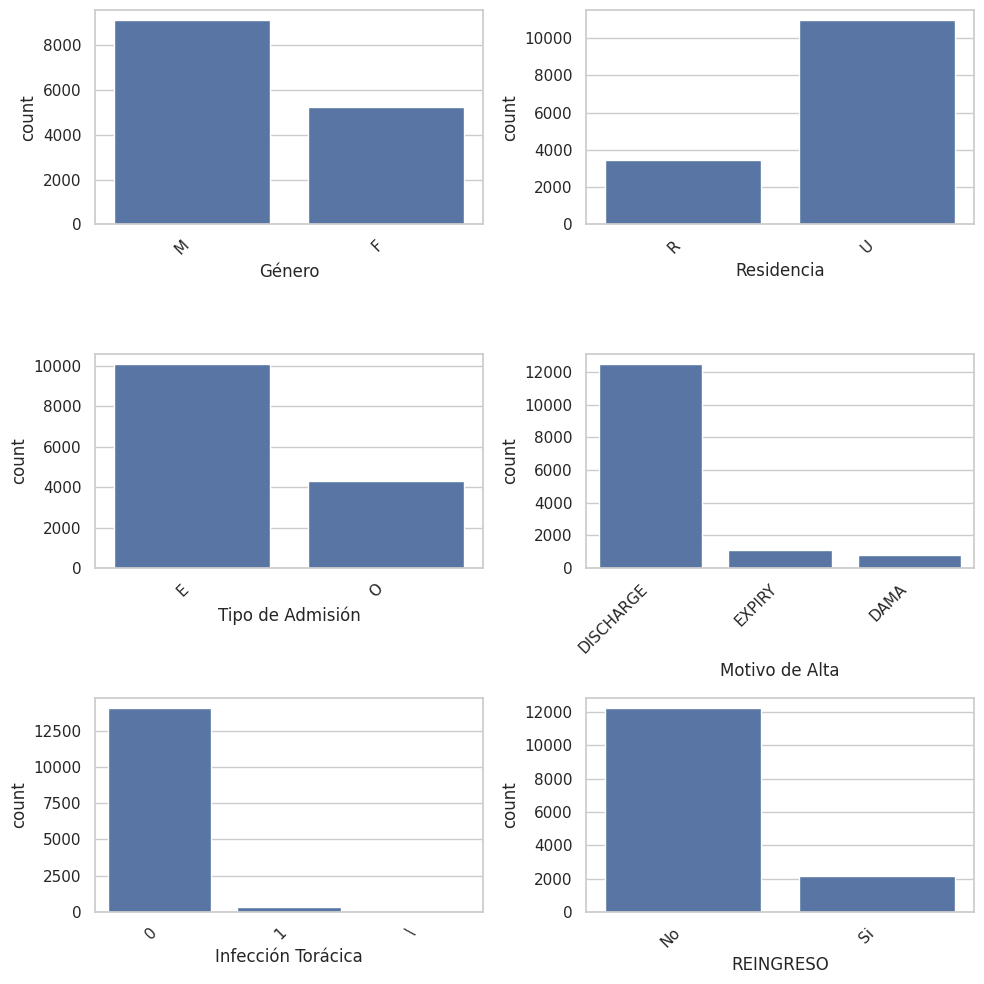

In [ ]:
fig, axis = plt.subplots(3, 2, figsize = (10, 10))

for i, cat in enumerate(categoricas_seleccionadas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df1[categoricas], x=cat)
    plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Se observa en el gráfico de infeccion torácica un signo que no corresponde (\), por lo que decido transformarlo en 0 ya que las patologías que tiene la persona con ese ID no son acorde a una infección torácica

In [ ]:
df1['Infección Torácica'].value_counts()

Infección Torácica
0    14071
1      327
\        1
Name: count, dtype: int64

In [ ]:
df1[df1['Infección Torácica'] == '\\']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
3253      354971    65      F          U                O  Sep-17   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
3253                     2                                  0      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
3253            0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
3253                        0      0                 0                   \   

         Fecha de Admisión Fecha de Alta Nro de Ingresos REINGRESO  
ADMISION                                                            
3253            2017-09-23    2017-09-24               1        No  

[1 rows x 57 columns]

In [ ]:
df1[df1['Infección Torácica'] == '\\']

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
3253      354971    65      F          U                O  Sep-17   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
3253                     2                                  0      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
3253            0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
3253                        0      0                 0                   \   

         Fecha de Admisión Fecha de Alta Nro de Ingresos REINGRESO  
ADMISION                                                            
3253            2017-09-23    2017-09-24               1        No  

[1 rows x 57 columns]

In [ ]:
df1.loc[3253, 'Infección Torácica'] = '0'

<ipython-input-449-82cf0d5b59e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df1[categoricas], x=cat, palette='viridis')
<ipython-input-449-82cf0d5b59e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df1[categoricas], x=cat, palette='viridis')
<ipython-input-449-82cf0d5b59e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df1[categoricas], x=cat, palette='viridis')
<ipython-input-449-82cf0d5b59e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

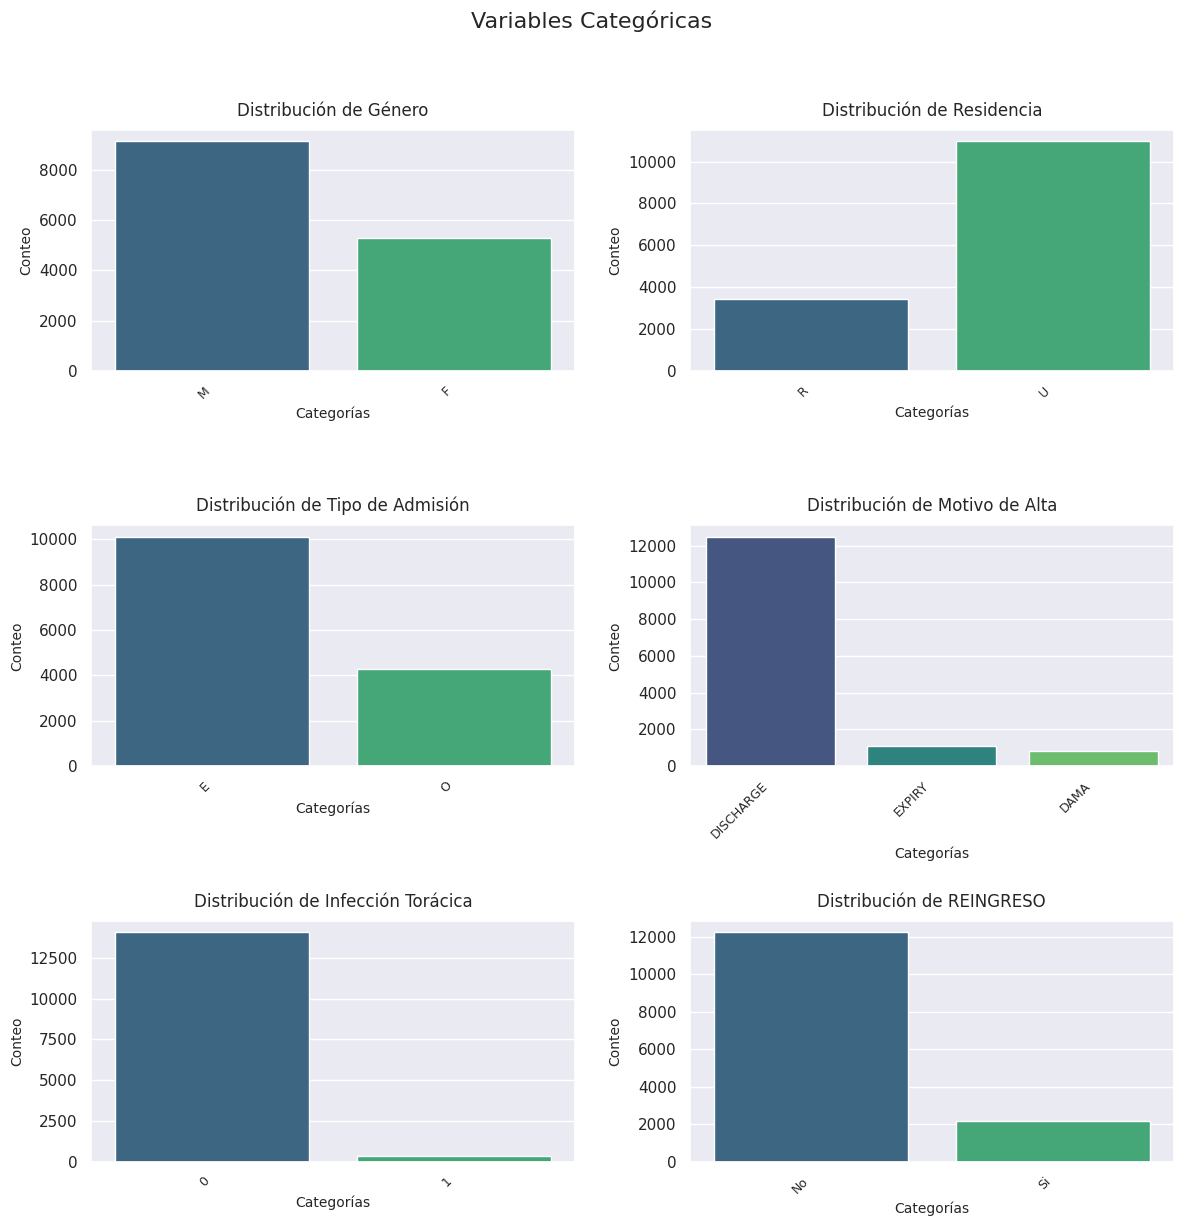

In [ ]:
sns.set_theme(style="darkgrid")


fig, axis = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Variables Categóricas', fontsize=16, y=1.02)

# Iterar sobre las variables categóricas seleccionadas
for i, cat in enumerate(categoricas_seleccionadas):
    row, col = i // 2, i % 2
    ax = axis[row, col]

    #Gráfico de conteo
    sns.countplot(ax=ax, data=df1[categoricas], x=cat, palette='viridis')

    #Etiquetas
    ax.set_title(f'Distribución de {cat}', fontsize=12, pad=10)
    ax.set_xlabel('Categorías', fontsize=10)
    ax.set_ylabel('Conteo', fontsize=10)

    #Etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

# Espacios entre subgráficos
plt.tight_layout(h_pad=2, w_pad=2)
plt.subplots_adjust(top=0.92)

plt.show()

####Numericas

In [ ]:
numericas = df1.select_dtypes(include=['int']).columns.tolist()
numericas

['Edad',
 'Duración Estadia',
 'Duración Estadia unidad intensiva',
 'Fumador',
 'Alcohol',
 'Diabetes Mellitus',
 'Hipertensión',
 'Enfermedad Coronaria Arterial',
 'Miocardiopatía',
 'Enfermedad Renal Crónica',
 'Enzimas Cardiacas Elevadas',
 'Anemia Severa',
 'Anemia',
 'Angina Estable',
 'Síndrome Coronario Agudo',
 'Infarto de Miocardio(STEMI)',
 'Dolor Torácico Atípico',
 'Insuficiencia Cardíaca',
 'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
 'Insuficiencia Cardíaca con Fracción de Eyección Normal',
 'Enfermedad Valvular Cardíaca',
 'Bloqueo Cardíaco Completo',
 'Síndrome del Nodo Sinusal Enfermo',
 'Lesión Renal Aguda',
 'Accidente Cerebrovascular Isquémico',
 'Accidente Cerebrovascular Hemorrágico',
 'Fibrilación Auricular',
 'Taquicardia Ventricular',
 'Taquicardia Supraventricular Paroxística',
 'Cardiopatía Congénita',
 'Infección del Tracto Urinario',
 'Síncope Neurocardiogénico',
 'Ortostático',
 'Endocarditis Infecciosa',
 'Trombosis Venosa Profunda',
 'Ch

In [ ]:
numericas_seleccionadas = ['Edad', 'Duración Estadia', 'Duración Estadia unidad intensiva', 'Nro de Ingresos']

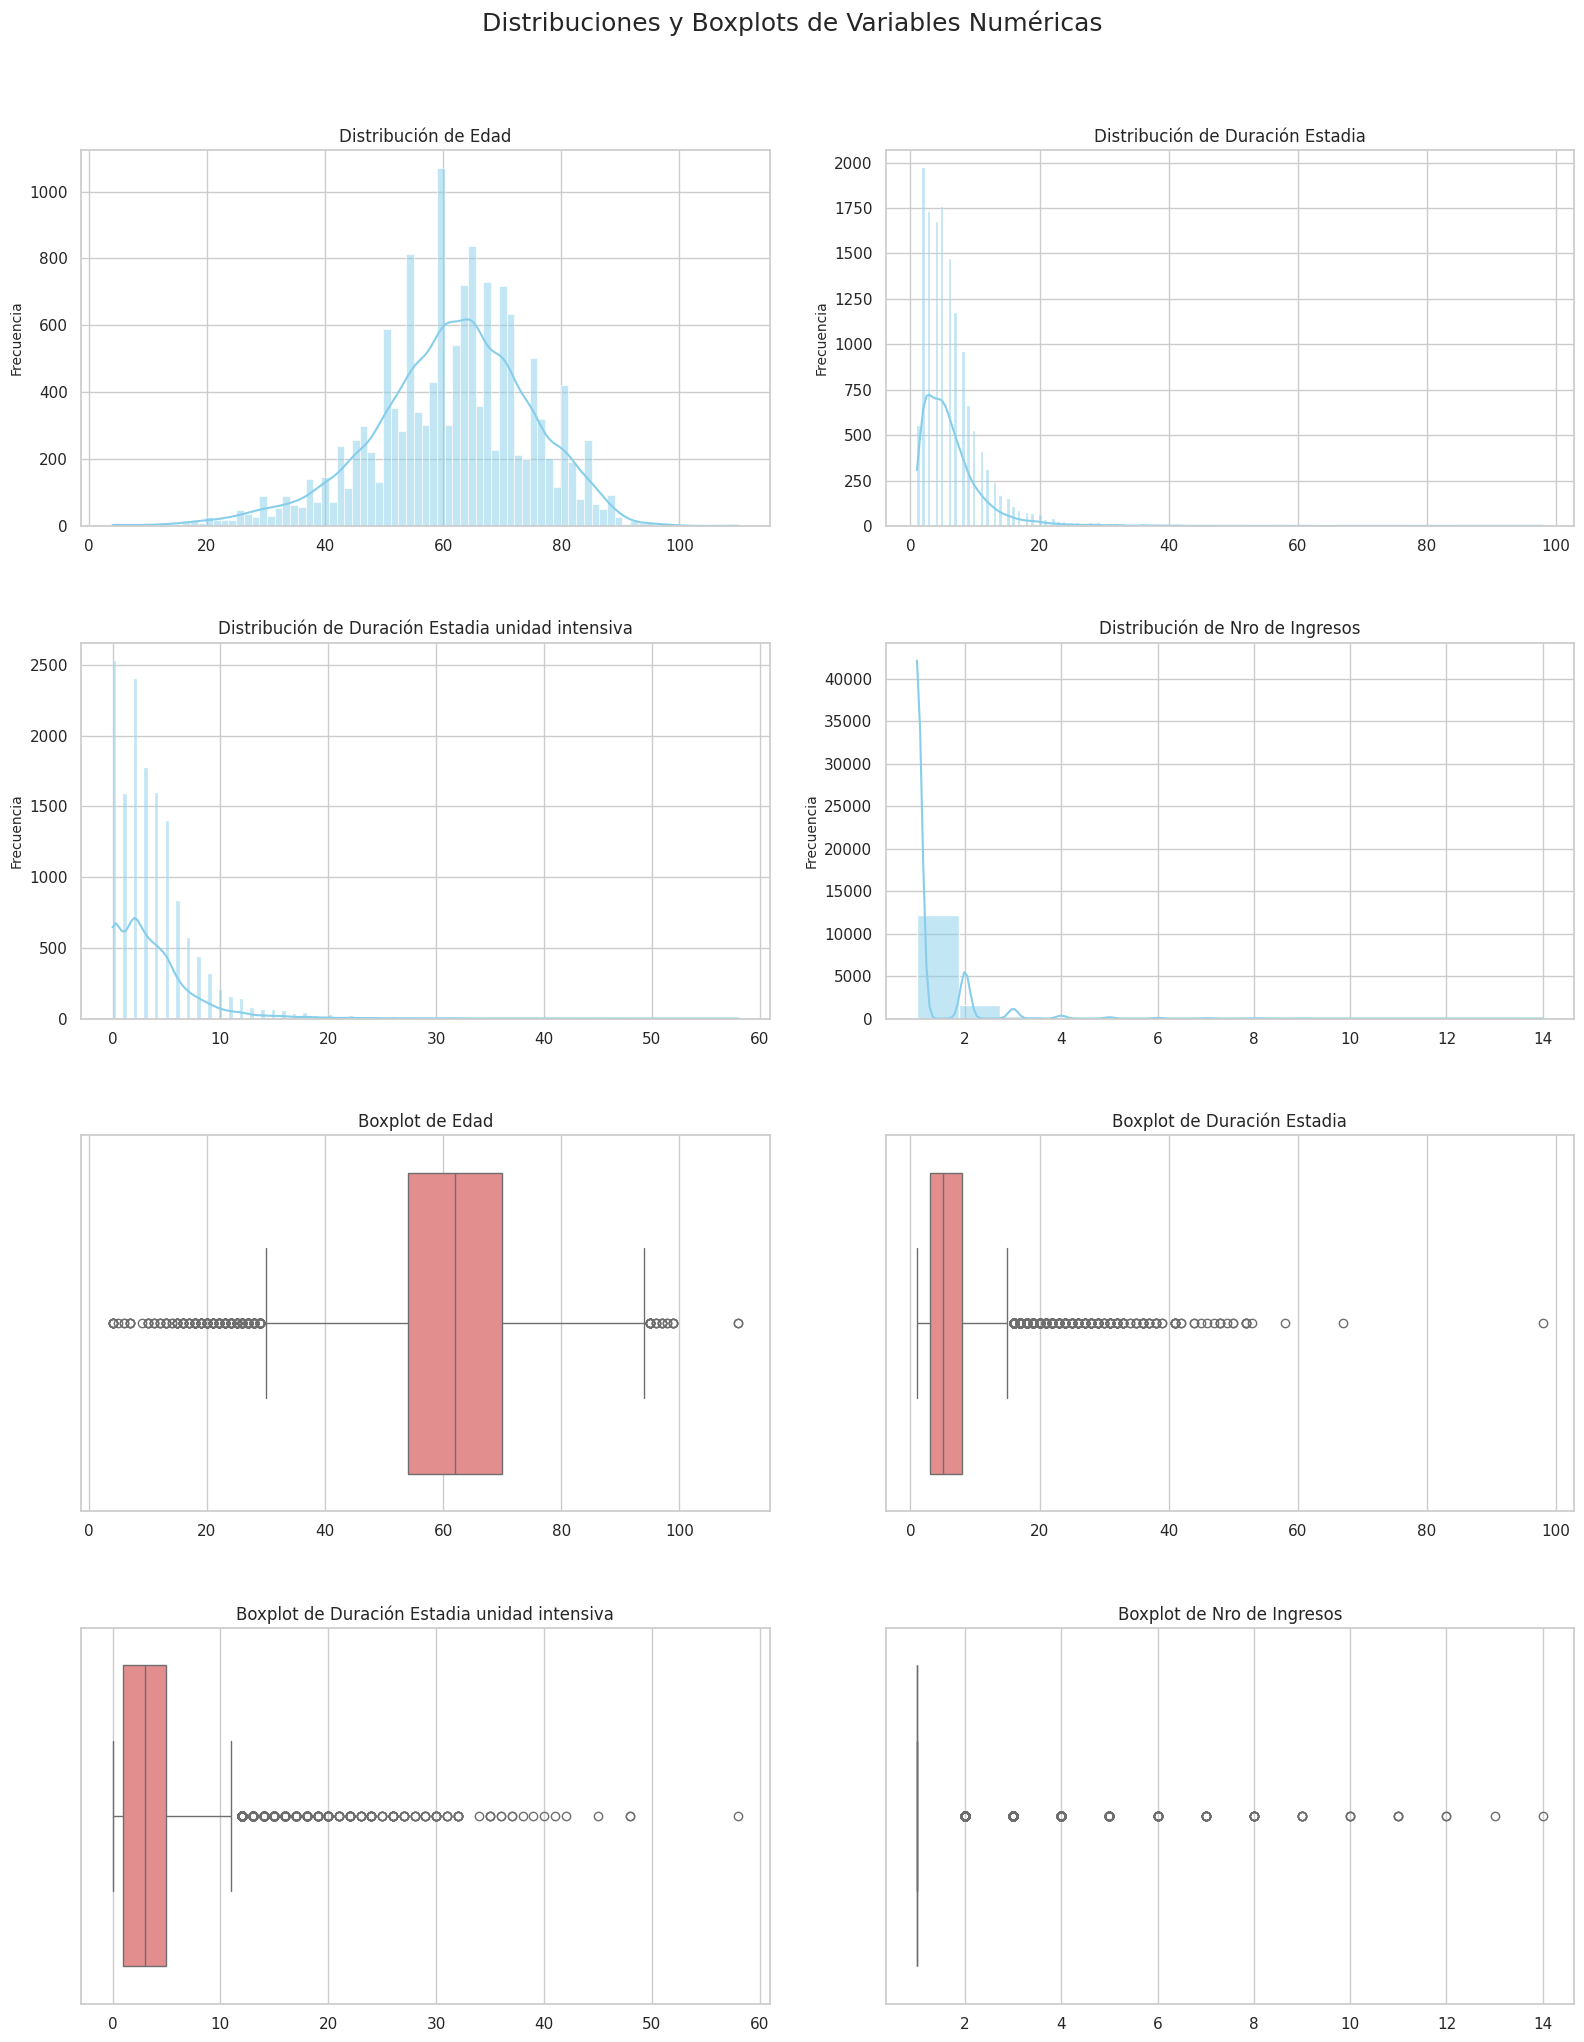

In [ ]:


sns.set_theme(style="whitegrid")

fig, axis = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Distribuciones y Boxplots de Variables Numéricas', fontsize=18, y=1.02)

for i, num in enumerate(numericas_seleccionadas):
    row_dist, col = i // 2, i % 2

    #Histograma
    sns.histplot(ax=axis[row_dist, col], data=df1, x=num, kde=True, color="skyblue")
    axis[row_dist, col].set_title(f'Distribución de {num}', fontsize=12)
    axis[row_dist, col].set_xlabel(None)
    axis[row_dist, col].set_ylabel('Frecuencia', fontsize=10)


    row_box = i // 2 + 2

    # Boxplot
    sns.boxplot(ax=axis[row_box, col], data=df1, x=num, color="lightcoral")
    axis[row_box, col].set_title(f'Boxplot de {num}', fontsize=12)
    axis[row_box, col].set_xlabel(None)
    axis[row_box, col].set_ylabel(None)

plt.tight_layout(h_pad=4, w_pad=2)
plt.subplots_adjust(top=0.95)


plt.show()


In [ ]:
numericas

['Edad',
 'Duración Estadia',
 'Duración Estadia unidad intensiva',
 'Fumador',
 'Alcohol',
 'Diabetes Mellitus',
 'Hipertensión',
 'Enfermedad Coronaria Arterial',
 'Miocardiopatía',
 'Enfermedad Renal Crónica',
 'Enzimas Cardiacas Elevadas',
 'Anemia Severa',
 'Anemia',
 'Angina Estable',
 'Síndrome Coronario Agudo',
 'Infarto de Miocardio(STEMI)',
 'Dolor Torácico Atípico',
 'Insuficiencia Cardíaca',
 'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
 'Insuficiencia Cardíaca con Fracción de Eyección Normal',
 'Enfermedad Valvular Cardíaca',
 'Bloqueo Cardíaco Completo',
 'Síndrome del Nodo Sinusal Enfermo',
 'Lesión Renal Aguda',
 'Accidente Cerebrovascular Isquémico',
 'Accidente Cerebrovascular Hemorrágico',
 'Fibrilación Auricular',
 'Taquicardia Ventricular',
 'Taquicardia Supraventricular Paroxística',
 'Cardiopatía Congénita',
 'Infección del Tracto Urinario',
 'Síncope Neurocardiogénico',
 'Ortostático',
 'Endocarditis Infecciosa',
 'Trombosis Venosa Profunda',
 'Ch

**DURACION DE ESTADIA**

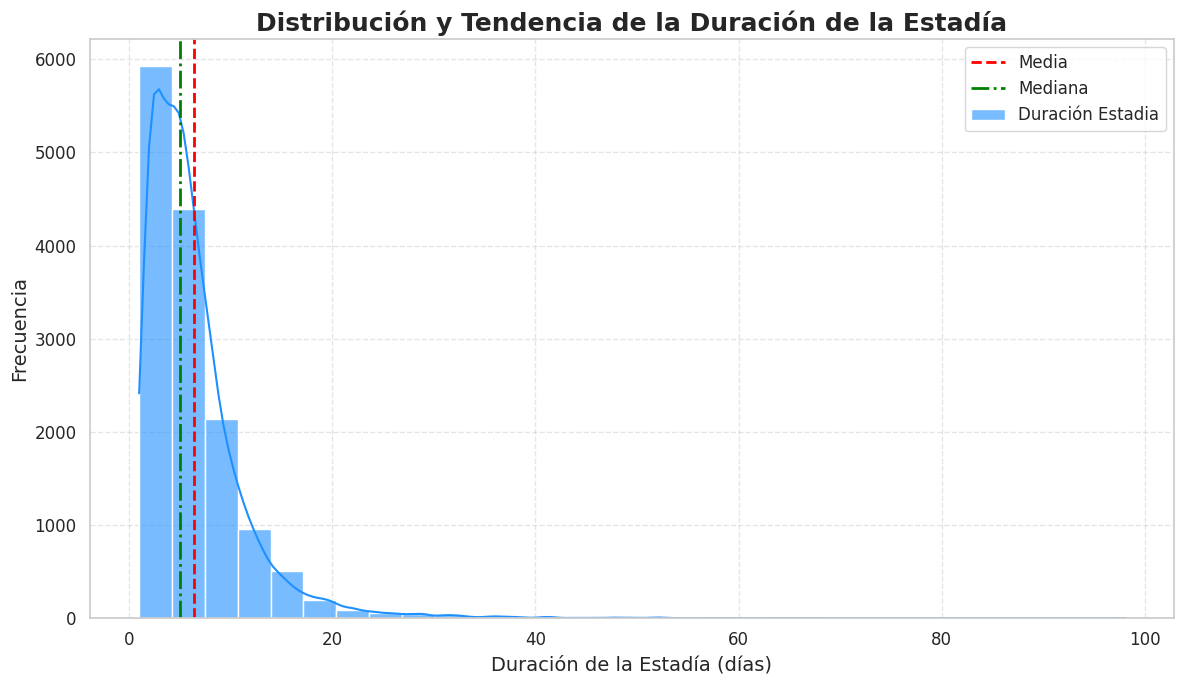

In [ ]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Crear el gráfico mejorado
plt.figure(figsize=(12, 7))
sns.histplot(
    df1['Duración Estadia'],
    kde=True,
    color='dodgerblue',
    label='Duración Estadia',
    bins=30,  # Ajustar el número de bins
    alpha=0.6  # Transparencia de las barras
)

# Mejorar detalles del gráfico
plt.title('Distribución y Tendencia de la Duración de la Estadía', fontsize=18, weight='bold')
plt.xlabel('Duración de la Estadía (días)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(df['Duración Estadia'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.axvline(df['Duración Estadia'].median(), color='green', linestyle='-.', linewidth=2, label='Mediana')

# Añadir leyenda y rejilla
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calculate descriptive statistics for 'Duración Estadia'
duration_stats = df1['Duración Estadia'].describe()
print(duration_stats)

# Calculate the median
median_duration = df1['Duración Estadia'].median()
print(f"Median Duration of Stay: {median_duration}")

count    14399.000000
mean         6.371901
std          5.019447
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: Duración Estadia, dtype: float64
Median Duration of Stay: 5.0


count    14399.000000
mean         6.371901
std          5.019447
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: Duración Estadia, dtype: float64
Median Duration of Stay: 5.0


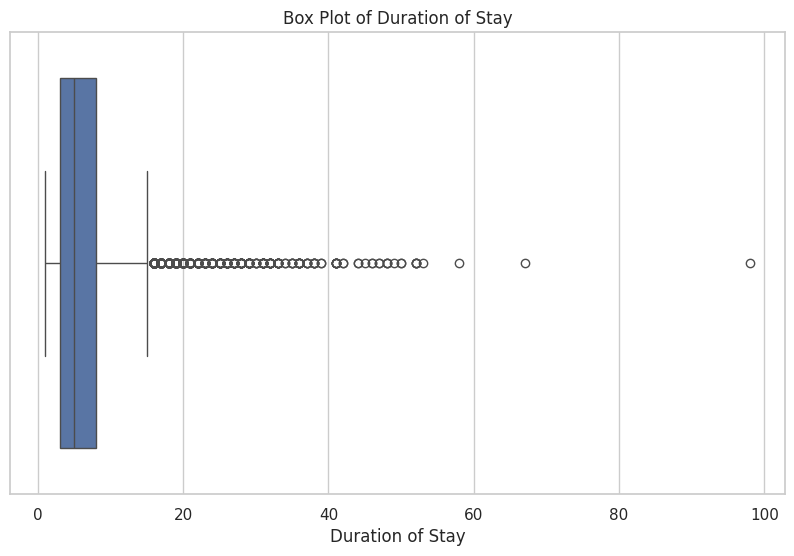

Number of outliers: 667
Outliers:
               ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
5         234486    60      F          U                E  Apr-17   
26        380213    56      M          U                O  Apr-17   
29        380206    70      F          U                E  Apr-17   
38        360115    80      F          U                E  Apr-17   
102       237696    89      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15486     350467    66      F          U                O  Mar-19   
15499     242319    57      F          R                E  Mar-19   
15536     689608    47      F          R                E  Mar-19   
15596     618650    68      M          U                E  Mar-19   
15647     695809    70      M          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motiv

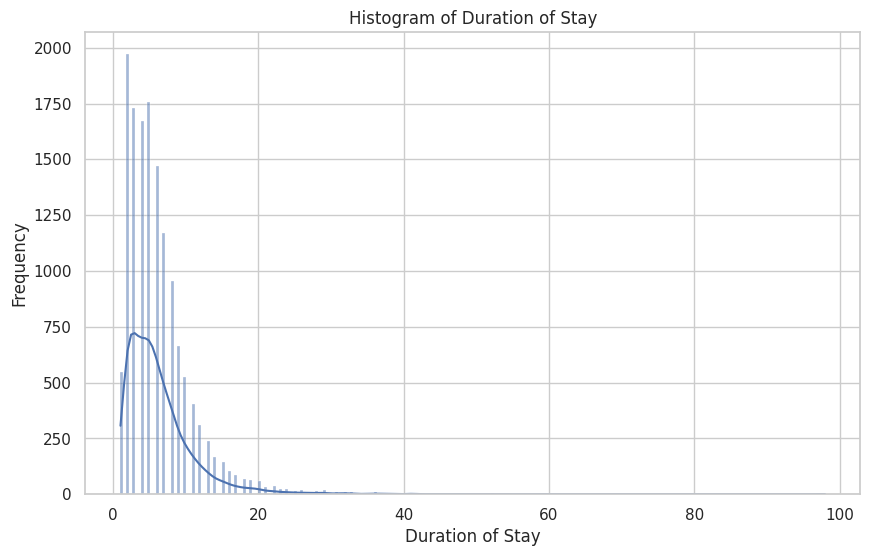

In [ ]:
# Calculate descriptive statistics for 'Duración Estadia'
duration_stats = df1['Duración Estadia'].describe()
print(duration_stats)

# Calculate the median
median_duration = df1['Duración Estadia'].median()
print(f"Median Duration of Stay: {median_duration}")

# Create a box plot of 'Duración Estadia'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Duración Estadia'])
plt.title('Box Plot of Duration of Stay')
plt.xlabel('Duration of Stay')
plt.show()


# Calculate the quartiles
q1 = df1['Duración Estadia'].quantile(0.25)
q3 = df1['Duración Estadia'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df1[(df1['Duración Estadia'] < lower_bound) | (df1['Duración Estadia'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("Outliers:\n", outliers)

# Create a histogram of 'Duración Estadia'
plt.figure(figsize=(10, 6))
sns.histplot(df1['Duración Estadia'], kde=True)
plt.title('Histogram of Duration of Stay')
plt.xlabel('Duration of Stay')
plt.ylabel('Frequency')
plt.show()

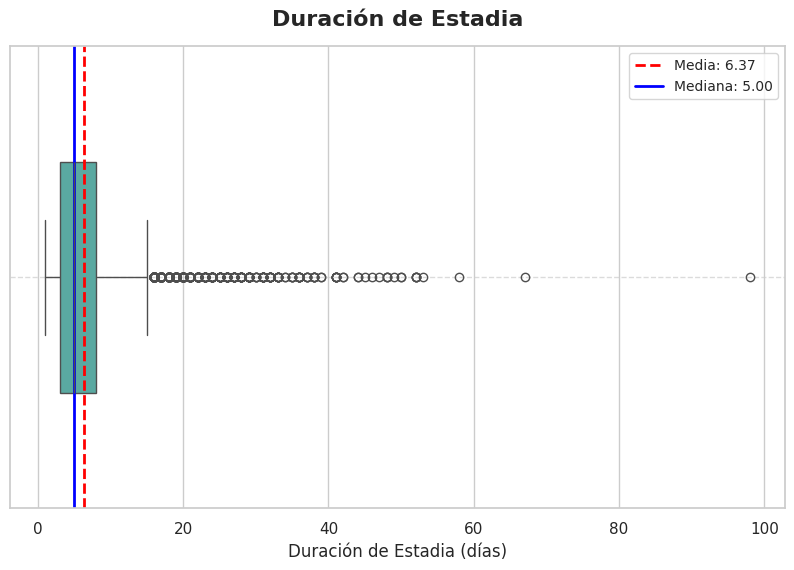

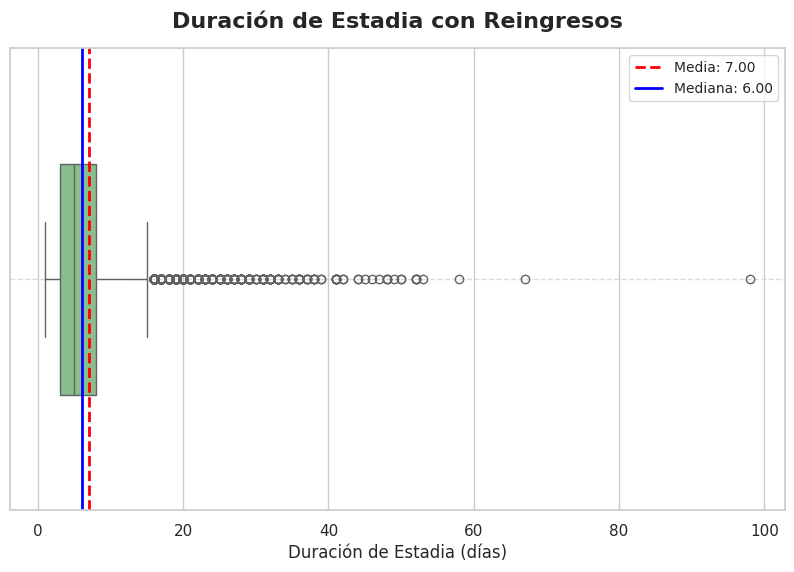

In [ ]:
# 1) BOX PLOT: Duración Estadia con líneas de media y mediana
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Duración Estadia'], color="#4DB6AC", width=0.5)

# Cálculos para líneas de media y mediana
mean_value = df1['Duración Estadia'].mean()
median_value = df1['Duración Estadia'].median()

# Añadir líneas de media y mediana al gráfico
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {median_value:.2f}')

# Ajustes del gráfico
plt.title('Duración de Estadia', fontsize=16, weight='bold', pad=15)
plt.xlabel('Duración de Estadia (días)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2) BOX PLOT: Duración Estadia para Reingresos (Si) con líneas de media y mediana
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Duración Estadia'], data=df1[df1['REINGRESO'] == 'Si'], color="#81C784", width=0.5)

# Cálculos para líneas de media y mediana
mean_value_reingreso = df1[df1['REINGRESO'] == 'Si']['Duración Estadia'].mean()
median_value_reingreso = df1[df1['REINGRESO'] == 'Si']['Duración Estadia'].median()

# Añadir líneas de media y mediana al gráfico
plt.axvline(mean_value_reingreso, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_value_reingreso:.2f}')
plt.axvline(median_value_reingreso, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {median_value_reingreso:.2f}')

# Ajustes del gráfico
plt.title('Duración de Estadia con Reingresos', fontsize=16, weight='bold', pad=15)
plt.xlabel('Duración de Estadia (días)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df1_reingreso=df1[df1['REINGRESO']=='Si']
df1_reingreso

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
156       176978    61      M          U                E  Apr-17   
209       234675    44      M          U                E  Apr-17   
316       249647    80      M          U                E  Apr-17   
357       146815    62      M          U                O  Apr-17   
418       360115    80      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15729     666139    63      F          U                E  Mar-19   
15739     453768    81      M          U                E  Mar-19   
15740     469288    49      M          U                O  Mar-19   
15749     273016    74      F          U                E  Mar-19   
15752     469963    60      F          U                E  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
156                     32                                  2         EXPIRY   
209                      6                                  2      DISCHARGE   
316                     15                                 14         EXPIRY   
357                      3                                  1      DISCHARGE   
418                     13                                  1      DISCHARGE   
...                    ...                                ...            ...   
15729                    5                                  3      DISCHARGE   
15739                   12                                  6      DISCHARGE   
15740                   11                                  3      DISCHARGE   
15749                    2                                  2      DISCHARGE   
15752                    9                                  9      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
156             0  ...                        0                          0   
209             0  ...                        0                          0   
316             0  ...                        0                          0   
357             0  ...                        0                          0   
418             0  ...                        0                          0   
...           ...  ...                      ...                        ...   
15729           0  ...                        0                          0   
15739           0  ...                        0                          0   
15740           0  ...                        0                          0   
15749           0  ...                        0                          0   
15752           0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
156                         1      1                 0                   0   
209                         0      0                 0                   0   
316                         1      1                 0                   0   
357                         0      0                 0                   0   
418                         0      0                 0                   0   
...                       ...    ...               ...                 ...   
15729                       0      0                 0                   0   
15739                       0      0                 0                   0   
15740                       0      0                 0                   0   
15749                       0      0                 0                   0   
15752                       0      0                 0                   0   

         Fecha de Admisión Fecha de Alta Nro 

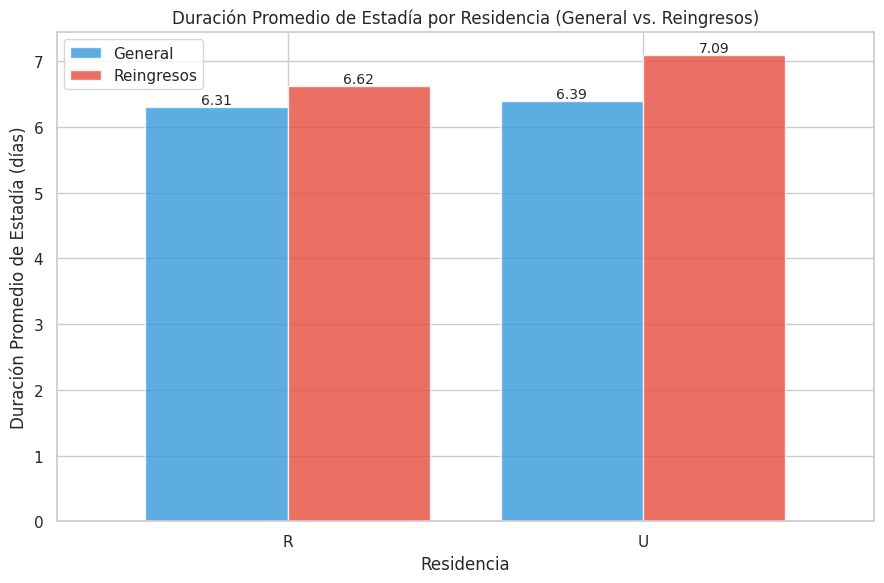

In [ ]:
# Preparar datos combinados
df1_general = df1.groupby('Residencia')['Duración Estadia'].mean().reset_index()
df1_reingresos = df1_reingreso.groupby('Residencia')['Duración Estadia'].mean().reset_index()

# Manejar posible error de columna inexistente
try:
    df1_combined = pd.merge(df1_general, df1_reingresos, on='Residencia', suffixes=('_General', '_Reingresos'))
except KeyError:
    print("Error: La columna 'Residencia' no existe en uno o ambos DataFrames.")
    # Puedes agregar código para manejar el error aquí, por ejemplo, mostrar un mensaje de error o usar una columna alternativa.
    df_combined = None  # O asignar un valor por defecto

# Gráfico combinado (solo si no hay error)
if df1_combined is not None:
    plt.figure(figsize=(9, 6))
    ax = df1_combined.plot(x='Residencia', kind='bar', width=0.8, ax=plt.gca(),
                          color=['#3498db', '#e74c3c'], alpha=0.8)

    # Añadir etiquetas a cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    # Personalización del gráfico
    plt.title('Duración Promedio de Estadía por Residencia (General vs. Reingresos)')
    plt.xlabel('Residencia')
    plt.ylabel('Duración Promedio de Estadía (días)')
    plt.xticks(rotation=0)
    plt.legend(['General', 'Reingresos'])
    plt.tight_layout()
    plt.show()

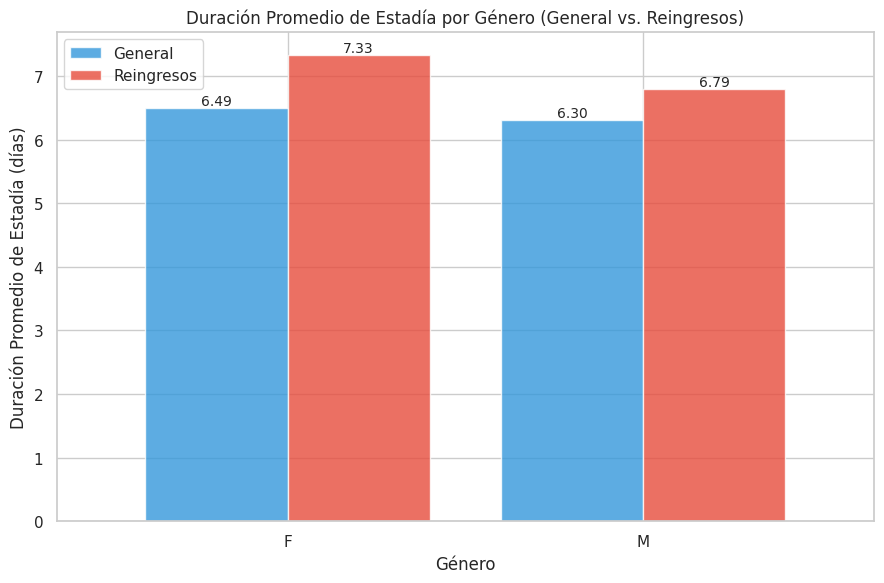

In [ ]:


# Preparar datos combinados
df1_general = df1.groupby('Género')['Duración Estadia'].mean().reset_index()
df1_reingresos = df1_reingreso.groupby('Género')['Duración Estadia'].mean().reset_index()

df1_combined = pd.merge(df1_general, df1_reingresos, on='Género', suffixes=('_General', '_Reingresos'))

# Gráfico combinado
plt.figure(figsize=(9, 6))
ax = df1_combined.plot(x='Género', kind='bar', width=0.8, ax=plt.gca(),
                      color=['#3498db', '#e74c3c'], alpha=0.8)

# Añadir etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Personalización del gráfico
plt.title('Duración Promedio de Estadía por Género (General vs. Reingresos)')
plt.xlabel('Género')
plt.ylabel('Duración Promedio de Estadía (días)')
plt.xticks(rotation=0)
plt.legend(['General', 'Reingresos'])
plt.tight_layout()
plt.show()

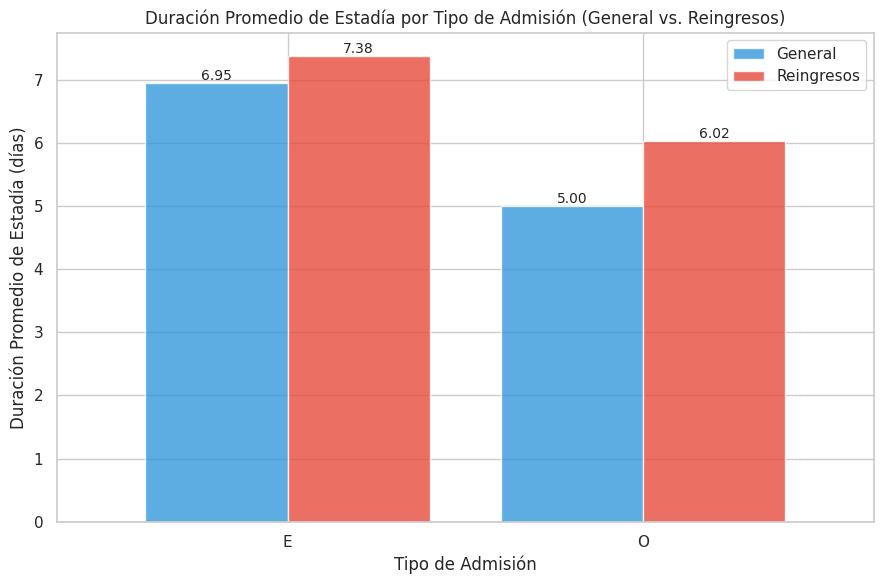

In [ ]:
# Preparar datos combinados
df1_general = df1.groupby('Tipo de Admisión')['Duración Estadia'].mean().reset_index()
df1_reingresos = df1_reingreso.groupby('Tipo de Admisión')['Duración Estadia'].mean().reset_index()

# Manejar posible error de columna inexistente
try:
    df1_combined = pd.merge(df1_general, df1_reingresos, on='Tipo de Admisión', suffixes=('_General', '_Reingresos'))
except KeyError:
    print("Error: La columna 'Tipo de Admisión' no existe en uno o ambos DataFrames.")
    # Puedes agregar código para manejar el error aquí, por ejemplo, mostrar un mensaje de error o usar una columna alternativa.
    df1_combined = None  # O asignar un valor por defecto


# Gráfico combinado (solo si no hay error)
if df1_combined is not None:
    plt.figure(figsize=(9, 6))
    ax = df1_combined.plot(x='Tipo de Admisión', kind='bar', width=0.8, ax=plt.gca(),
                          color=['#3498db', '#e74c3c'], alpha=0.8)

    # Añadir etiquetas a cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    # Personalización del gráfico
    plt.title('Duración Promedio de Estadía por Tipo de Admisión (General vs. Reingresos)')
    plt.xlabel('Tipo de Admisión')
    plt.ylabel('Duración Promedio de Estadía (días)')
    plt.xticks(rotation=0)
    plt.legend(['General', 'Reingresos'])
    plt.tight_layout()
    plt.show()

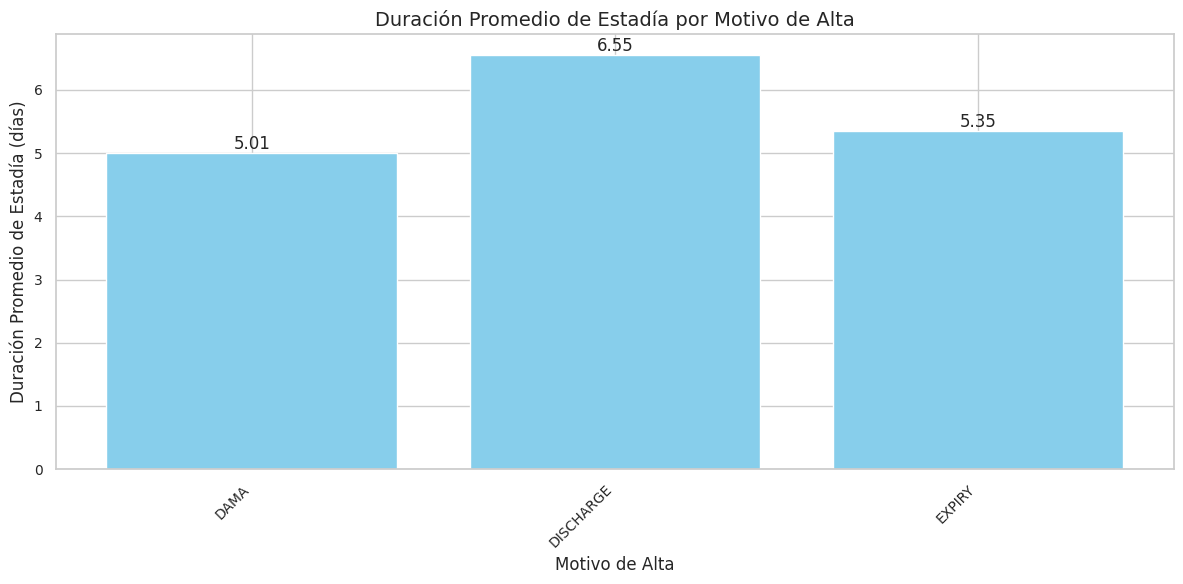

In [ ]:
# Assuming 'df' is your DataFrame and it has columns 'Duración Estadia' and 'Motivo de Alta'
# Group data by 'Motivo de Alta' and calculate the mean 'Duración Estadia'
average_stay_by_reason = df1.groupby('Motivo de Alta')['Duración Estadia'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(average_stay_by_reason.index, average_stay_by_reason.values, color='skyblue')

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

# Customize plot labels and title
plt.xlabel('Motivo de Alta', fontsize=12)
plt.ylabel('Duración Promedio de Estadía (días)', fontsize=12)
plt.title('Duración Promedio de Estadía por Motivo de Alta', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()

In [ ]:
df_numerico = df1.select_dtypes(include=['number'])

In [ ]:
df_numerico

Edad  Duración Estadia  Duración Estadia unidad intensiva  Fumador  \
ADMISION                                                                       
1           81                 3                                  2        0   
2           65                 5                                  2        0   
3           53                 3                                  3        0   
4           67                 8                                  6        0   
5           60                23                                  9        0   
...        ...               ...                                ...      ...   
15752       60                 9                                  9        0   
15753       86                 5                                  1        0   
15754       50                 2                                  2        0   
15755       82                10                                  5        0   
15756       59                 4                                  2        0   

          Alcohol  Diabetes Mellitus  Hipertensión  \
ADMISION                                             
1               0                  1             0   
2               1                  0             1   
3               0                  1             0   
4               0                  0             1   
5               0                  0             1   
...           ...                ...           ...   
15752           0                  0             0   
15753           0                  1             1   
15754           0                  1             1   
15755           0                  0             1   
15756           0                  0             1   

          Enfermedad Coronaria Arterial  Miocardiopatía  \
ADMISION                                                  
1                                     0               0   
2                                     1               0   
3                                     1               0   
4                                     1               0   
5                                     0               1   
...                                 ...             ...   
15752                                 1               0   
15753                                 1               0   
15754                                 0               1   
15755                                 1               0   
15756                                 1               0   

          Enfermedad Renal Crónica  ...  Cardiopatía Congénita  \
ADMISION                            ...                          
1                                0  ...                      0   
2                                0  ...                      0   
3                                0  ...                      0   
4                                0  ...                      0   
5                                0  ...                      0   
...                            ...  ...                    ...   
15752                            0  ...                      0   
15753                            0  ...                      0   
15754                            0  ...                      0   
15755                            0  ...                      0   
15756                            0  ...                      0   

          Infección del Tracto Urinario  Síncope Neurocardiogénico  \
ADMISION                                                             
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   
...                                 ...                        ...   
15752                                 0                          0   
15753    

In [ ]:
columnas = ['Diabetes Mellitus', 'Hipertensión', 'Enfermedad Coronaria Arterial', 'Miocardiopatía',
       'Enfermedad Renal Crónica', 'Enzimas Cardiacas Elevadas',
       'Anemia Severa', 'Anemia', 'Angina Estable', 'Síndrome Coronario Agudo',
       'Infarto de Miocardio(STEMI)', 'Dolor Torácico Atípico',
       'Insuficiencia Cardíaca',
       'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
       'Insuficiencia Cardíaca con Fracción de Eyección Normal',
       'Enfermedad Valvular Cardíaca', 'Bloqueo Cardíaco Completo',
       'Síndrome del Nodo Sinusal Enfermo', 'Lesión Renal Aguda',
       'Accidente Cerebrovascular Isquémico',
       'Accidente Cerebrovascular Hemorrágico', 'Fibrilación Auricular',
       'Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística',
       'Cardiopatía Congénita', 'Infección del Tracto Urinario',
       'Síncope Neurocardiogénico', 'Ortostático', 'Endocarditis Infecciosa',
       'Trombosis Venosa Profunda', 'Choque Cardiogénico', 'Shock',
       'Embolia Pulmonar']
df_patologias = df1[columnas]

In [ ]:
df_patologias

Diabetes Mellitus  Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                                   
1                         1             0                              0   
2                         0             1                              1   
3                         1             0                              1   
4                         0             1                              1   
5                         0             1                              0   
...                     ...           ...                            ...   
15752                     0             0                              1   
15753                     1             1                              1   
15754                     1             1                              0   
15755                     0             1                              1   
15756                     0             1                              1   

          Miocardiopatía  Enfermedad Renal Crónica  \
ADMISION                                             
1                      0                         0   
2                      0                         0   
3                      0                         0   
4                      0                         0   
5                      1                         0   
...                  ...                       ...   
15752                  0                         0   
15753                  0                         0   
15754                  1                         0   
15755                  0                         0   
15756                  0                         0   

          Enzimas Cardiacas Elevadas  Anemia Severa  Anemia  Angina Estable  \
ADMISION                                                                      
1                                  1              0       1               0   
2                                  0              0       0               0   
3                                  0              0       0               0   
4                                  0              0       0               0   
5                                  0              0       0               0   
...                              ...            ...     ...             ...   
15752                              1              0       1               0   
15753                              1              0       1               0   
15754                              0              0       0               0   
15755                              0              0       1               0   
15756                              0              0       0               0   

          Síndrome Coronario Agudo  ...  \
ADMISION                            ...   
1                                1  ...   
2                                0  ...   
3                                0  ...   
4                                0  ...   
5                                0  ...   
...                            ...  ...   
15752                            0  ...   
15753                            1  ...   
15754                            0  ...   
15755                            0  ...   
15756                            0  ...   

          Taquicardia Supraventricular Paroxística  Cardiopatía Congénita  \
ADMISION                                                                    
1                                                0                      0   
2                                                0                      0   
3                                                0                      0   
4                                                0                      0   
5                                                0                      0   
...                                            ...                    ...   
15752                                            0                      0   
15753                                

In [ ]:
df_correlaciones = df_patologias.copy()

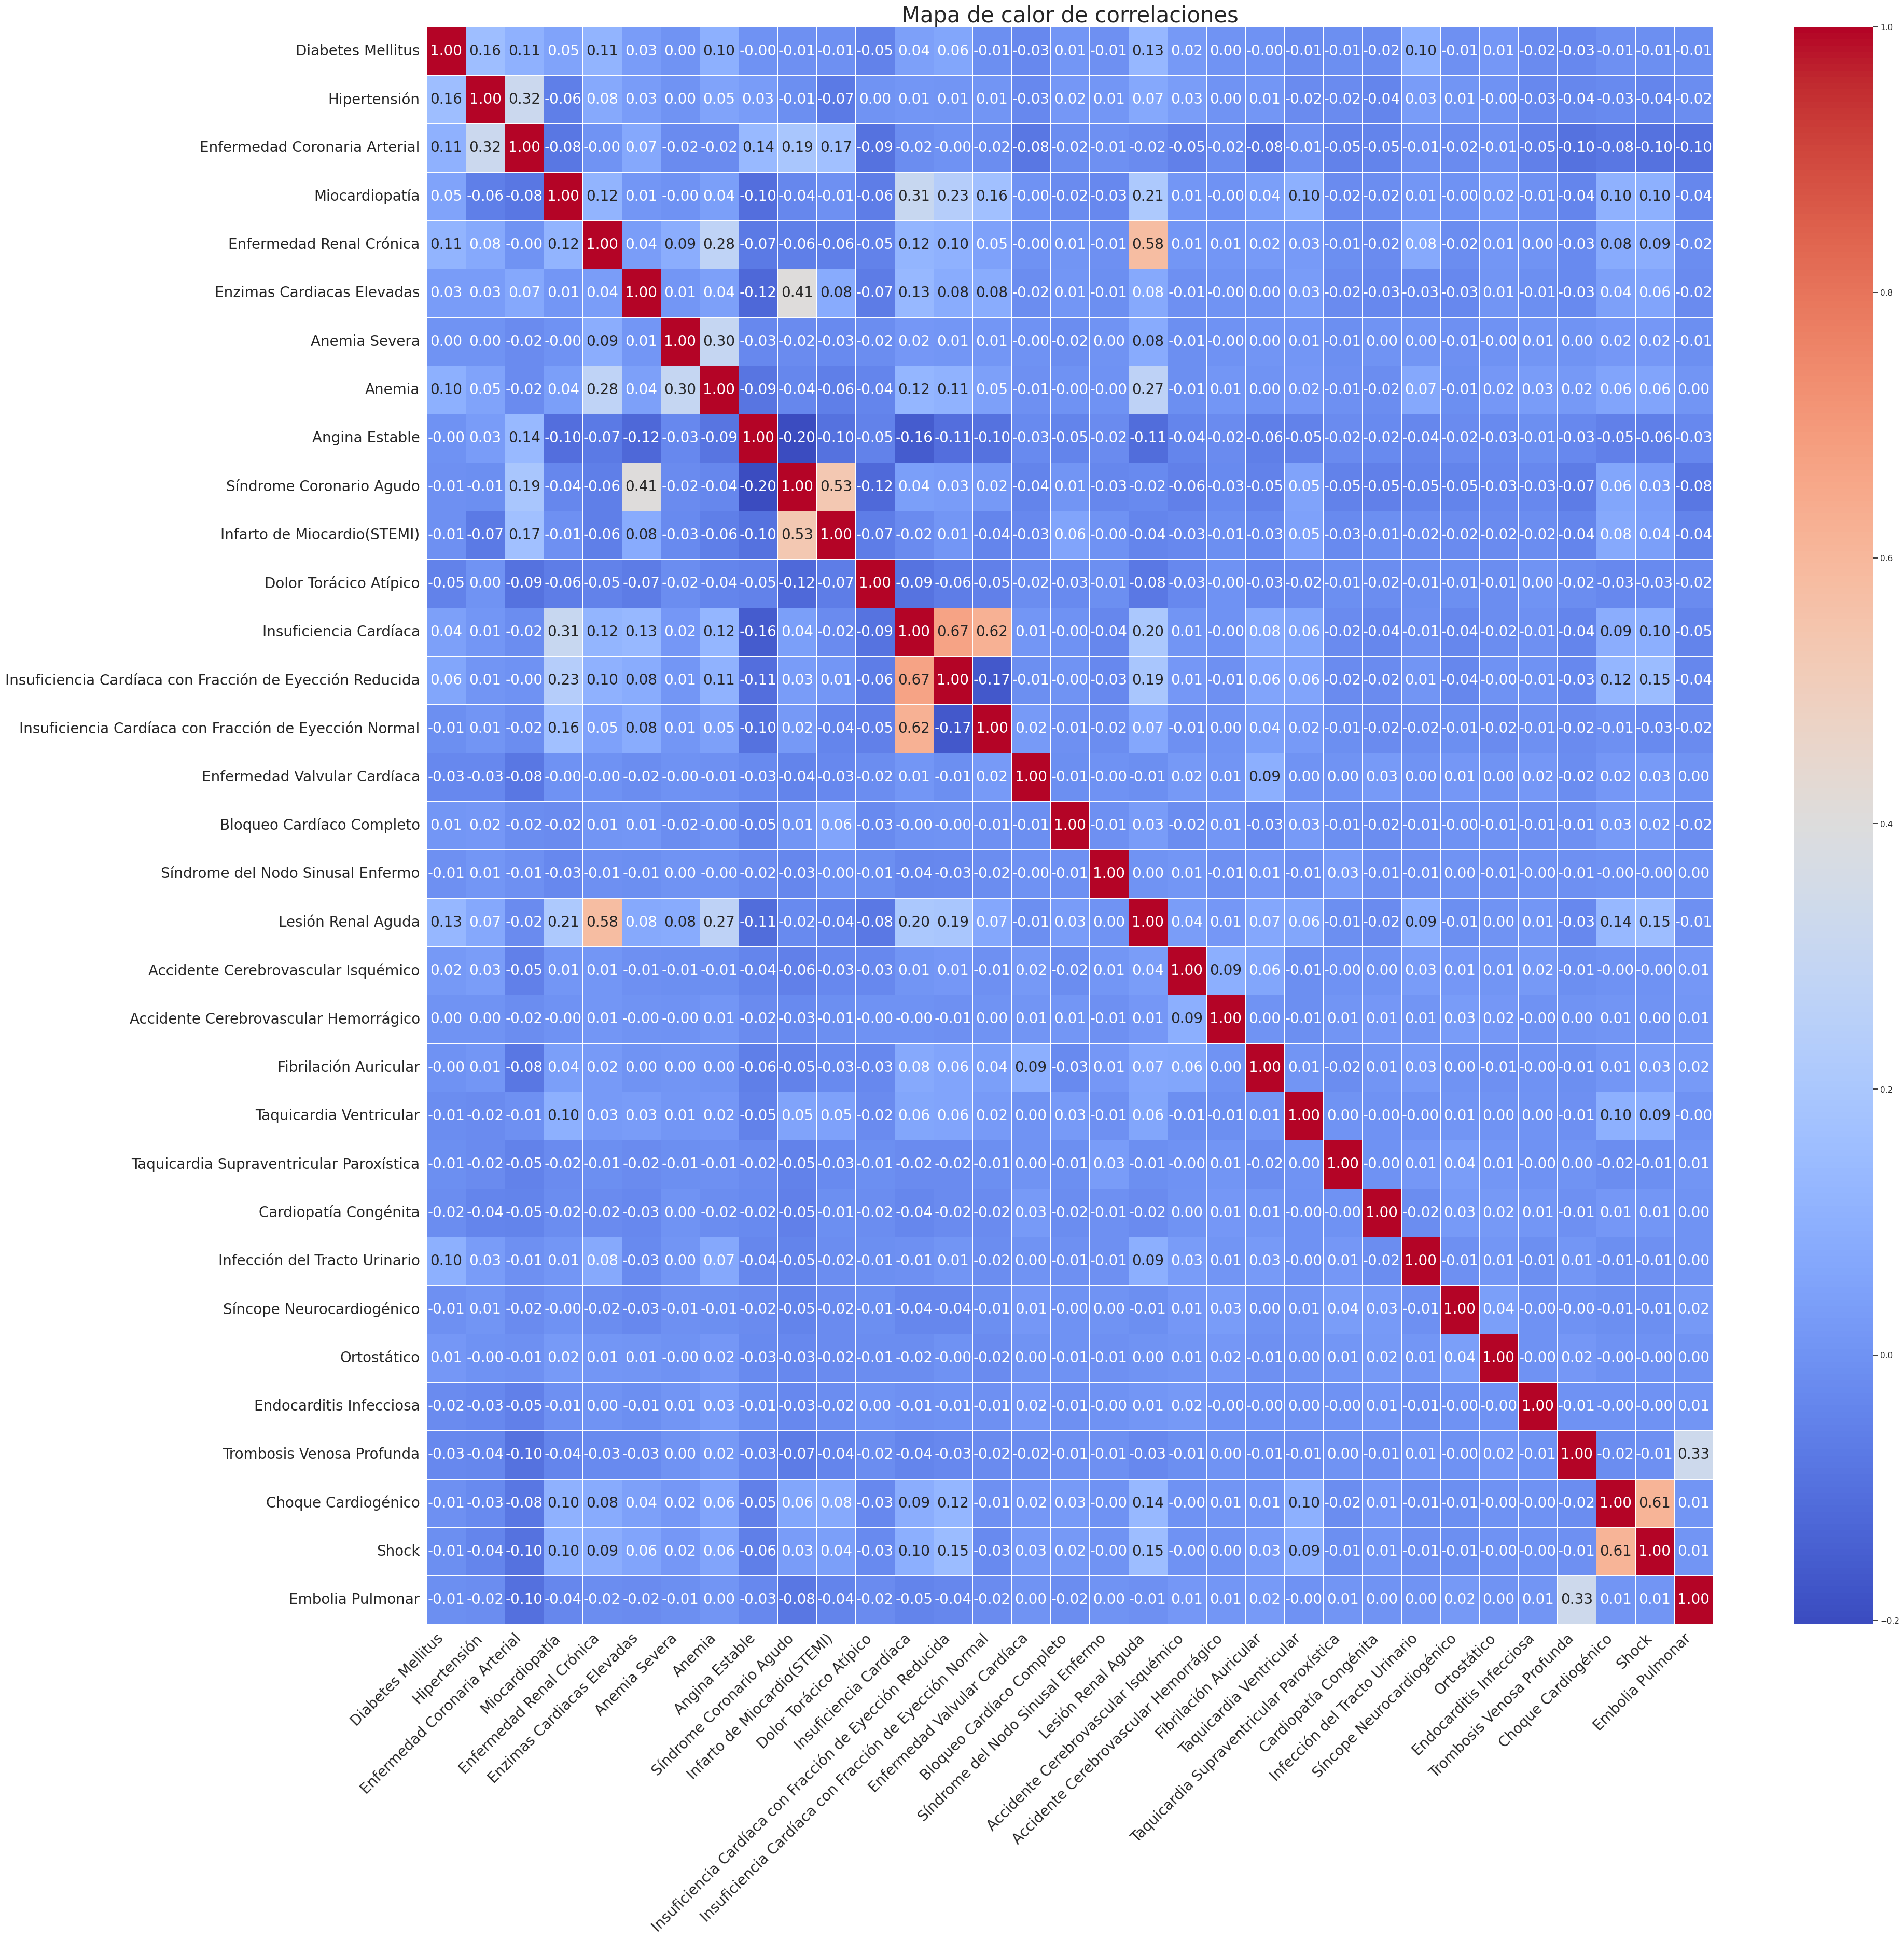

In [ ]:
plt.figure(figsize=(40, 40))

sns.heatmap(
    df_patologias.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 20},
    linewidths=0.5
)


plt.title('Mapa de calor de correlaciones', fontsize=30)
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20)


plt.show()


####ANALISIS MULTIVARIANTE

Tomando en cuenta que nuestra variable target es Duracion estadia

In [ ]:
df1.isnull().sum()

ID                                                             0
Edad                                                           0
Género                                                         0
Residencia                                                     0
Tipo de Admisión                                               0
Mes-Año                                                        0
Duración Estadia                                               0
Duración Estadia unidad intensiva                              0
Motivo de Alta                                                 0
Fumador                                                        0
Alcohol                                                        0
Diabetes Mellitus                                              0
Hipertensión                                                   0
Enfermedad Coronaria Arterial                                  0
Miocardiopatía                                                 0
Enfermedad Renal Crónica                                       0
Hemoglobina                                                  243
Leucocitos                                                   273
Plaquetas                                                    274
Glucosa                                                      829
Urea                                                         234
Creatinina                                                   239
Péptido Natriurético Tipo B                                 7829
Enzimas Cardiacas Elevadas                                     0
Fracción de Eyección                                        1398
Anemia Severa                                                  0
Anemia                                                         0
Angina Estable                                                 0
Síndrome Coronario Agudo                                       0
Infarto de Miocardio(STEMI)                                    0
Dolor Torácico Atípico                                         0
Insuficiencia Cardíaca                                         0
Insuficiencia Cardíaca con Fracción de Eyección Reducida       0
Insuficiencia Cardíaca con Fracción de Eyección Normal         0
Enfermedad Valvular Cardíaca                                   0
Bloqueo Cardíaco Completo                                      0
Síndrome del Nodo Sinusal Enfermo                              0
Lesión Renal Aguda                                             0
Accidente Cerebrovascular Isquémico                            0
Accidente Cerebrovascular Hemorrágico                          0
Fibrilación Auricular                                          0
Taquicardia Ventricular                                        0
Taquicardia Supraventricular Paroxística                       0
Cardiopatía Congénita                                          0
Infección del Tracto Urinario                                  0
Síncope Neurocardiogénico                                      0
Ortostático                                                    0
Endocarditis Infecciosa                                        0
Trombosis Venosa Profunda                                      0
Choque Cardiogénico                                            0
Shock                                                          0
Embolia Pulmonar                                               0
Infección Torácica                                             0
Fecha de Admisión                                              0
Fecha de Alta                                                  0
Nro de Ingresos                                                0
REINGRESO                                                      0
dtype: int64

In [ ]:
df1

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
1         234735    81      M          R                E  Apr-17   
2         234696    65      M          R                E  Apr-17   
3         234882    53      M          U                E  Apr-17   
4         234635    67      F          U                E  Apr-17   
5         234486    60      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15752     469963    60      F          U                E  Mar-19   
15753     699585    86      F          U                O  Mar-19   
15754     699500    50      M          R                E  Mar-19   
15755     700415    82      M          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
1                        3                                  2      DISCHARGE   
2                        5                                  2      DISCHARGE   
3                        3                                  3      DISCHARGE   
4                        8                                  6      DISCHARGE   
5                       23                                  9      DISCHARGE   
...                    ...                                ...            ...   
15752                    9                                  9      DISCHARGE   
15753                    5                                  1      DISCHARGE   
15754                    2                                  2         EXPIRY   
15755                   10                                  5      DISCHARGE   
15756                    4                                  2      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
1               0  ...                        0                          0   
2               0  ...                        0                          0   
3               0  ...                        0                          0   
4               0  ...                        0                          0   
5               0  ...                        0                          0   
...           ...  ...                      ...                        ...   
15752           0  ...                        0                          0   
15753           0  ...                        0                          0   
15754           0  ...                        0                          0   
15755           0  ...                        0                          0   
15756           0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
1                           0      0                 0                   0   
2                           0      0                 0                   0   
3                           0      0                 0                   0   
4                           0      0                 0                   0   
5                           0      0                 0                   0   
...                       ...    ...               ...                 ...   
15752                       0      0                 0                   0   
15753                       0      0                 0                   0   
15754                       0      0                 0                   0   
15755                       0      0                 0                   0   
15756                       0      0                 0                   0   

         Fecha de Admisión Fecha de Alta Nro 

In [ ]:
df1.to_csv('df1_dataframe.csv', index=False)

INGENERÍA DE CARACTERÍSTICAS

In [ ]:
df2 = df1.copy()


In [ ]:
df2

ID  Edad Género Residencia Tipo de Admisión Mes-Año  \
ADMISION                                                            
1         234735    81      M          R                E  Apr-17   
2         234696    65      M          R                E  Apr-17   
3         234882    53      M          U                E  Apr-17   
4         234635    67      F          U                E  Apr-17   
5         234486    60      F          U                E  Apr-17   
...          ...   ...    ...        ...              ...     ...   
15752     469963    60      F          U                E  Mar-19   
15753     699585    86      F          U                O  Mar-19   
15754     699500    50      M          R                E  Mar-19   
15755     700415    82      M          U                E  Mar-19   
15756     699524    59      F          U                O  Mar-19   

          Duración Estadia  Duración Estadia unidad intensiva Motivo de Alta  \
ADMISION                                                                       
1                        3                                  2      DISCHARGE   
2                        5                                  2      DISCHARGE   
3                        3                                  3      DISCHARGE   
4                        8                                  6      DISCHARGE   
5                       23                                  9      DISCHARGE   
...                    ...                                ...            ...   
15752                    9                                  9      DISCHARGE   
15753                    5                                  1      DISCHARGE   
15754                    2                                  2         EXPIRY   
15755                   10                                  5      DISCHARGE   
15756                    4                                  2      DISCHARGE   

          Fumador  ...  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION           ...                                                       
1               0  ...                        0                          0   
2               0  ...                        0                          0   
3               0  ...                        0                          0   
4               0  ...                        0                          0   
5               0  ...                        0                          0   
...           ...  ...                      ...                        ...   
15752           0  ...                        0                          0   
15753           0  ...                        0                          0   
15754           0  ...                        0                          0   
15755           0  ...                        0                          0   
15756           0  ...                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
1                           0      0                 0                   0   
2                           0      0                 0                   0   
3                           0      0                 0                   0   
4                           0      0                 0                   0   
5                           0      0                 0                   0   
...                       ...    ...               ...                 ...   
15752                       0      0                 0                   0   
15753                       0      0                 0                   0   
15754                       0      0                 0                   0   
15755                       0      0                 0                   0   
15756                       0      0                 0                   0   

         Fecha de Admisión Fecha de Alta Nro 

In [ ]:
#Elimino columnas que creo no son necesarias
df2 = df2.drop(columns=['Fecha de Admisión'])
df2 = df2.drop(columns=['Fecha de Alta'])
df2 = df2.drop(columns=['Mes-Año'])

In [ ]:
df2 = df2.drop(columns=['Hemoglobina'])
df2 = df2.drop(columns=['Leucocitos'])
df2 = df2.drop(columns=['Glucosa'])
df2 = df2.drop(columns=['Plaquetas'])
df2 = df2.drop(columns=['Urea'])
df2 = df2.drop(columns=['Creatinina'])
df2 = df2.drop(columns=['Péptido Natriurético Tipo B'])
df2 = df2.drop(columns=['Fracción de Eyección'])

In [ ]:
df2

ID  Edad Género Residencia Tipo de Admisión  Duración Estadia  \
ADMISION                                                                      
1         234735    81      M          R                E                 3   
2         234696    65      M          R                E                 5   
3         234882    53      M          U                E                 3   
4         234635    67      F          U                E                 8   
5         234486    60      F          U                E                23   
...          ...   ...    ...        ...              ...               ...   
15752     469963    60      F          U                E                 9   
15753     699585    86      F          U                O                 5   
15754     699500    50      M          R                E                 2   
15755     700415    82      M          U                E                10   
15756     699524    59      F          U                O                 4   

          Duración Estadia unidad intensiva Motivo de Alta  Fumador  Alcohol  \
ADMISION                                                                       
1                                         2      DISCHARGE        0        0   
2                                         2      DISCHARGE        0        1   
3                                         3      DISCHARGE        0        0   
4                                         6      DISCHARGE        0        0   
5                                         9      DISCHARGE        0        0   
...                                     ...            ...      ...      ...   
15752                                     9      DISCHARGE        0        0   
15753                                     1      DISCHARGE        0        0   
15754                                     2         EXPIRY        0        0   
15755                                     5      DISCHARGE        0        0   
15756                                     2      DISCHARGE        0        0   

          ...  Síncope Neurocardiogénico  Ortostático  \
ADMISION  ...                                           
1         ...                          0            0   
2         ...                          0            0   
3         ...                          0            0   
4         ...                          0            0   
5         ...                          0            0   
...       ...                        ...          ...   
15752     ...                          0            0   
15753     ...                          0            0   
15754     ...                          0            0   
15755     ...                          0            0   
15756     ...                          0            0   

          Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                       
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          0   
...                           ...                        ...   
15752                           0                          0   
15753                           0                          0   
15754                           0                          0   
15755                           0                          0   
15756                           0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  \
ADMISION                                                                     
1                           0      0                 0                   0   
2                           0      0                 0                   0   
3                           0      0                 0    

In [ ]:
df2.columns

Index(['ID', 'Edad', 'Género', 'Residencia', 'Tipo de Admisión',
       'Duración Estadia', 'Duración Estadia unidad intensiva',
       'Motivo de Alta', 'Fumador', 'Alcohol', 'Diabetes Mellitus',
       'Hipertensión', 'Enfermedad Coronaria Arterial', 'Miocardiopatía',
       'Enfermedad Renal Crónica', 'Enzimas Cardiacas Elevadas',
       'Anemia Severa', 'Anemia', 'Angina Estable', 'Síndrome Coronario Agudo',
       'Infarto de Miocardio(STEMI)', 'Dolor Torácico Atípico',
       'Insuficiencia Cardíaca',
       'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
       'Insuficiencia Cardíaca con Fracción de Eyección Normal',
       'Enfermedad Valvular Cardíaca', 'Bloqueo Cardíaco Completo',
       'Síndrome del Nodo Sinusal Enfermo', 'Lesión Renal Aguda',
       'Accidente Cerebrovascular Isquémico',
       'Accidente Cerebrovascular Hemorrágico', 'Fibrilación Auricular',
       'Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística',
       'Cardiopatía Cong

In [ ]:
df2 = df2.drop(columns=['ID'])
df2 = df2.drop(columns=['Nro de Ingresos'])

In [ ]:
df2.columns

Index(['Edad', 'Género', 'Residencia', 'Tipo de Admisión', 'Duración Estadia',
       'Duración Estadia unidad intensiva', 'Motivo de Alta', 'Fumador',
       'Alcohol', 'Diabetes Mellitus', 'Hipertensión',
       'Enfermedad Coronaria Arterial', 'Miocardiopatía',
       'Enfermedad Renal Crónica', 'Enzimas Cardiacas Elevadas',
       'Anemia Severa', 'Anemia', 'Angina Estable', 'Síndrome Coronario Agudo',
       'Infarto de Miocardio(STEMI)', 'Dolor Torácico Atípico',
       'Insuficiencia Cardíaca',
       'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
       'Insuficiencia Cardíaca con Fracción de Eyección Normal',
       'Enfermedad Valvular Cardíaca', 'Bloqueo Cardíaco Completo',
       'Síndrome del Nodo Sinusal Enfermo', 'Lesión Renal Aguda',
       'Accidente Cerebrovascular Isquémico',
       'Accidente Cerebrovascular Hemorrágico', 'Fibrilación Auricular',
       'Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística',
       'Cardiopatía Congénita'

In [ ]:
df2 = df2.drop(columns=['Enzimas Cardiacas Elevadas'])

In [ ]:
df2

Edad Género Residencia Tipo de Admisión  Duración Estadia  \
ADMISION                                                              
1           81      M          R                E                 3   
2           65      M          R                E                 5   
3           53      M          U                E                 3   
4           67      F          U                E                 8   
5           60      F          U                E                23   
...        ...    ...        ...              ...               ...   
15752       60      F          U                E                 9   
15753       86      F          U                O                 5   
15754       50      M          R                E                 2   
15755       82      M          U                E                10   
15756       59      F          U                O                 4   

          Duración Estadia unidad intensiva Motivo de Alta  Fumador  Alcohol  \
ADMISION                                                                       
1                                         2      DISCHARGE        0        0   
2                                         2      DISCHARGE        0        1   
3                                         3      DISCHARGE        0        0   
4                                         6      DISCHARGE        0        0   
5                                         9      DISCHARGE        0        0   
...                                     ...            ...      ...      ...   
15752                                     9      DISCHARGE        0        0   
15753                                     1      DISCHARGE        0        0   
15754                                     2         EXPIRY        0        0   
15755                                     5      DISCHARGE        0        0   
15756                                     2      DISCHARGE        0        0   

          Diabetes Mellitus  ...  Infección del Tracto Urinario  \
ADMISION                     ...                                  
1                         1  ...                              0   
2                         0  ...                              0   
3                         1  ...                              0   
4                         0  ...                              0   
5                         0  ...                              0   
...                     ...  ...                            ...   
15752                     0  ...                              0   
15753                     1  ...                              0   
15754                     1  ...                              0   
15755                     0  ...                              0   
15756                     0  ...                              0   

          Síncope Neurocardiogénico  Ortostático  Endocarditis Infecciosa  \
ADMISION                                                                    
1                                 0            0                        0   
2                                 0            0                        0   
3                                 0            0                        0   
4                                 0            0                        0   
5                                 0            0                        0   
...                             ...          ...                      ...   
15752                             0            0                        0   
15753                             0            0                        0   
15754                             0            0                        0   
15755                             0            0                        0   
15756                             0            0                        0   

          Trombosis Venosa Profunda  Choque Cardiogénico  Shock  \
ADMISION                                                          
1                                 0  

In [ ]:
df2.columns

Index(['Edad', 'Género', 'Residencia', 'Tipo de Admisión', 'Duración Estadia',
       'Duración Estadia unidad intensiva', 'Motivo de Alta', 'Fumador',
       'Alcohol', 'Diabetes Mellitus', 'Hipertensión',
       'Enfermedad Coronaria Arterial', 'Miocardiopatía',
       'Enfermedad Renal Crónica', 'Anemia Severa', 'Anemia', 'Angina Estable',
       'Síndrome Coronario Agudo', 'Infarto de Miocardio(STEMI)',
       'Dolor Torácico Atípico', 'Insuficiencia Cardíaca',
       'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
       'Insuficiencia Cardíaca con Fracción de Eyección Normal',
       'Enfermedad Valvular Cardíaca', 'Bloqueo Cardíaco Completo',
       'Síndrome del Nodo Sinusal Enfermo', 'Lesión Renal Aguda',
       'Accidente Cerebrovascular Isquémico',
       'Accidente Cerebrovascular Hemorrágico', 'Fibrilación Auricular',
       'Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística',
       'Cardiopatía Congénita', 'Infección del Tracto Urinario',
  

In [ ]:
df3= df2.copy()

#### ESTUDIO GRADO DE OCUPACION DE CAMAS

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 57 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   ID                                                        14399 non-null  object        
 1   Edad                                                      14399 non-null  int64         
 2   Género                                                    14399 non-null  object        
 3   Residencia                                                14399 non-null  object        
 4   Tipo de Admisión                                          14399 non-null  object        
 5   Mes-Año                                                   14399 non-null  object        
 6   Duración Estadia                                          14399 non-null  int64         
 7   Duración Estadia unidad intensiva            

Numero de ocupacion

            Patients
Date                
2017-04-01        29
2017-04-02        38
2017-04-03        56
2017-04-04        61
2017-04-05        60
...              ...
2019-04-19         1
2019-04-20         1
2019-04-21         1
2019-04-22         1
2019-04-23         0

[753 rows x 1 columns]


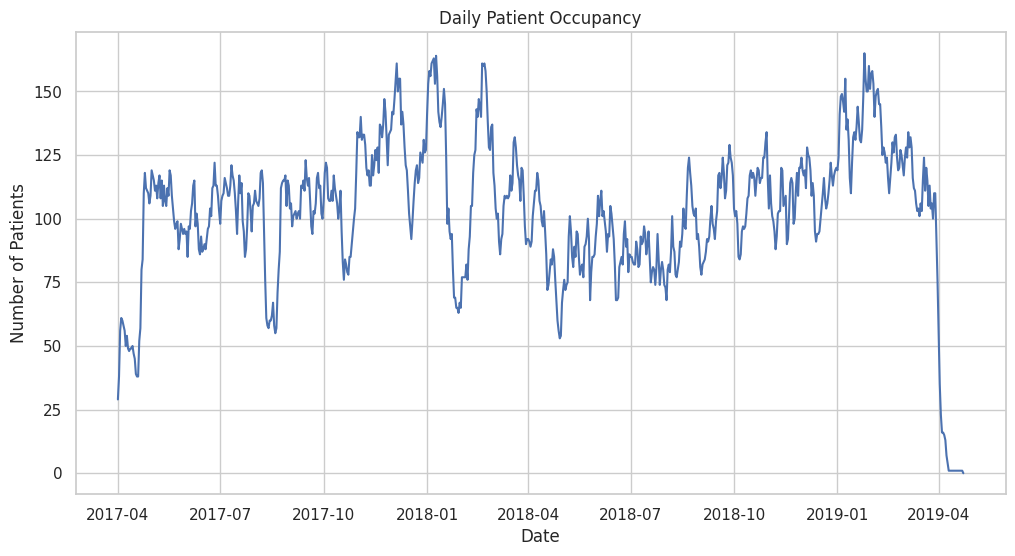

In [ ]:
# prompt: calcular pacientes internador por dia usar df Dia de admision y df dia dealta

import pandas as pd

# Assuming your DataFrame is named 'df1' and has columns 'Dia de admision' and 'Dia de alta'
# Replace 'df1' with your actual DataFrame name if different

# Convert 'Dia de admision' and 'Dia de alta' to datetime objects if they are not already
df1[' Fecha de Admisión'] = pd.to_datetime(df1['Fecha de Admisión'])
df1['Fecha de Alta'] = pd.to_datetime(df1['Fecha de Alta'])

# Create a date range covering all admission and discharge dates
date_range = pd.date_range(start=df1['Fecha de Admisión'].min(), end=df1['Fecha de Alta'].max())

# Initialize a dictionary to store the daily patient counts
daily_patients = {}

# Iterate through each date in the date range
for date in date_range:
  # Count patients admitted but not yet discharged on the current date
  admitted_patients = df1[(df1['Fecha de Admisión'] <= date) & (df1['Fecha de Alta'] > date)]
  daily_patients[date] = len(admitted_patients)

# Create a DataFrame from the daily patient counts
daily_patient_df = pd.DataFrame(list(daily_patients.items()), columns=['Date', 'Patients'])

# Set 'Date' as the index
daily_patient_df = daily_patient_df.set_index('Date')

# Print or visualize the results
print(daily_patient_df)

# Example visualization (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_patient_df.index, daily_patient_df['Patients'])
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Daily Patient Occupancy')
plt.grid(True)
plt.show()


In [ ]:
# prompt: sacar en funcion del maximo de toda la serie tempora  calcular el nivel de ocupacion en % por dia

def daily_occupancy(df):
    # Convert date columns to datetime objects
    df[' Fecha de Admisión'] = pd.to_datetime(df['Fecha de Admisión'])
    df['Fecha de Alta'] = pd.to_datetime(df['Fecha de Alta'])

    # Find the overall maximum number of patients
    max_patients = 0
    date_range = pd.date_range(start=df['Fecha de Admisión'].min(), end=df['Fecha de Alta'].max())
    for date in date_range:
        admitted_patients = df[(df['Fecha de Admisión'] <= date) & (df['Fecha de Alta'] > date)]
        max_patients = max(max_patients, len(admitted_patients))

    # Calculate daily occupancy percentage
    daily_occupancy_percentage = {}
    for date in date_range:
        admitted_patients = df[(df['Fecha de Admisión'] <= date) & (df['Fecha de Alta'] > date)]
        daily_occupancy_percentage[date] = (len(admitted_patients) / max_patients) * 100 if max_patients else 0

    # Create a DataFrame
    occupancy_df = pd.DataFrame(list(daily_occupancy_percentage.items()), columns=['Date', 'Occupancy (%)'])
    occupancy_df = occupancy_df.set_index('Date')
    return occupancy_df

# Example usage (assuming your DataFrame is named df1):
occupancy_df = daily_occupancy(df1)
occupancy_df


Occupancy (%)
Date                     
2017-04-01      17.575758
2017-04-02      23.030303
2017-04-03      33.939394
2017-04-04      36.969697
2017-04-05      36.363636
...                   ...
2019-04-19       0.606061
2019-04-20       0.606061
2019-04-21       0.606061
2019-04-22       0.606061
2019-04-23       0.000000

[753 rows x 1 columns]

#MODELOS

###MODELOS 1 : ESTIMAR READMISION

#### Modelo - Estimación de readmision sin balancear

In [ ]:
df3

Edad Género Residencia Tipo de Admisión  Duración Estadia  \
ADMISION                                                              
1           81      M          R                E                 3   
2           65      M          R                E                 5   
3           53      M          U                E                 3   
4           67      F          U                E                 8   
5           60      F          U                E                23   
...        ...    ...        ...              ...               ...   
15752       60      F          U                E                 9   
15753       86      F          U                O                 5   
15754       50      M          R                E                 2   
15755       82      M          U                E                10   
15756       59      F          U                O                 4   

          Duración Estadia unidad intensiva Motivo de Alta  Fumador  Alcohol  \
ADMISION                                                                       
1                                         2      DISCHARGE        0        0   
2                                         2      DISCHARGE        0        1   
3                                         3      DISCHARGE        0        0   
4                                         6      DISCHARGE        0        0   
5                                         9      DISCHARGE        0        0   
...                                     ...            ...      ...      ...   
15752                                     9      DISCHARGE        0        0   
15753                                     1      DISCHARGE        0        0   
15754                                     2         EXPIRY        0        0   
15755                                     5      DISCHARGE        0        0   
15756                                     2      DISCHARGE        0        0   

          Diabetes Mellitus  ...  Infección del Tracto Urinario  \
ADMISION                     ...                                  
1                         1  ...                              0   
2                         0  ...                              0   
3                         1  ...                              0   
4                         0  ...                              0   
5                         0  ...                              0   
...                     ...  ...                            ...   
15752                     0  ...                              0   
15753                     1  ...                              0   
15754                     1  ...                              0   
15755                     0  ...                              0   
15756                     0  ...                              0   

          Síncope Neurocardiogénico  Ortostático  Endocarditis Infecciosa  \
ADMISION                                                                    
1                                 0            0                        0   
2                                 0            0                        0   
3                                 0            0                        0   
4                                 0            0                        0   
5                                 0            0                        0   
...                             ...          ...                      ...   
15752                             0            0                        0   
15753                             0            0                        0   
15754                             0            0                        0   
15755                             0            0                        0   
15756                             0            0                        0   

          Trombosis Venosa Profunda  Choque Cardiogénico  Shock  \
ADMISION                                                          
1                                 0  

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Edad                                                      14399 non-null  int64 
 1   Género                                                    14399 non-null  object
 2   Residencia                                                14399 non-null  object
 3   Tipo de Admisión                                          14399 non-null  object
 4   Duración Estadia                                          14399 non-null  int64 
 5   Duración Estadia unidad intensiva                         14399 non-null  int64 
 6   Motivo de Alta                                            14399 non-null  object
 7   Fumador                                                   14399 non-null  int64 
 8   Alcohol                        

In [ ]:
le = LabelEncoder()

for column in ['Género', 'Residencia', 'Tipo de Admisión','Motivo de Alta','REINGRESO']:
    df3[column] = le.fit_transform(df3[column])


In [ ]:
# Convert the column to integers
df3['Infección Torácica'] = df3['Infección Torácica'].astype(int)


In [ ]:
X = df3.drop(['REINGRESO', 'Duración Estadia', 'Duración Estadia unidad intensiva', 'Motivo de Alta'], axis=1)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Edad                                                      14399 non-null  int64
 1   Género                                                    14399 non-null  int64
 2   Residencia                                                14399 non-null  int64
 3   Tipo de Admisión                                          14399 non-null  int64
 4   Fumador                                                   14399 non-null  int64
 5   Alcohol                                                   14399 non-null  int64
 6   Diabetes Mellitus                                         14399 non-null  int64
 7   Hipertensión                                              14399 non-null  int64
 8   Enfermedad Coronaria Arterial            

In [ ]:
X

Edad  Género  Residencia  Tipo de Admisión  Fumador  Alcohol  \
ADMISION                                                                 
1           81       1           0                 0        0        0   
2           65       1           0                 0        0        1   
3           53       1           1                 0        0        0   
4           67       0           1                 0        0        0   
5           60       0           1                 0        0        0   
...        ...     ...         ...               ...      ...      ...   
15752       60       0           1                 0        0        0   
15753       86       0           1                 1        0        0   
15754       50       1           0                 0        0        0   
15755       82       1           1                 0        0        0   
15756       59       0           1                 1        0        0   

          Diabetes Mellitus  Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                                   
1                         1             0                              0   
2                         0             1                              1   
3                         1             0                              1   
4                         0             1                              1   
5                         0             1                              0   
...                     ...           ...                            ...   
15752                     0             0                              1   
15753                     1             1                              1   
15754                     1             1                              0   
15755                     0             1                              1   
15756                     0             1                              1   

          Miocardiopatía  ...  Cardiopatía Congénita  \
ADMISION                  ...                          
1                      0  ...                      0   
2                      0  ...                      0   
3                      0  ...                      0   
4                      0  ...                      0   
5                      1  ...                      0   
...                  ...  ...                    ...   
15752                  0  ...                      0   
15753                  0  ...                      0   
15754                  1  ...                      0   
15755                  0  ...                      0   
15756                  0  ...                      0   

          Infección del Tracto Urinario  Síncope Neurocardiogénico  \
ADMISION                                                             
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   
...                                 ...                        ...   
15752                                 0                          0   
15753                                 0                          0   
15754                                 0                          0   
15755                                 0                          0   
15756                                 0                          0   

          Ortostático  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                                    
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0            

In [ ]:

y= df3['REINGRESO']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X.head()

Edad  Género  Residencia  Tipo de Admisión  Fumador  Alcohol  \
ADMISION                                                                 
1           81       1           0                 0        0        0   
2           65       1           0                 0        0        1   
3           53       1           1                 0        0        0   
4           67       0           1                 0        0        0   
5           60       0           1                 0        0        0   

          Diabetes Mellitus  Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                                   
1                         1             0                              0   
2                         0             1                              1   
3                         1             0                              1   
4                         0             1                              1   
5                         0             1                              0   

          Miocardiopatía  ...  Cardiopatía Congénita  \
ADMISION                  ...                          
1                      0  ...                      0   
2                      0  ...                      0   
3                      0  ...                      0   
4                      0  ...                      0   
5                      1  ...                      0   

          Infección del Tracto Urinario  Síncope Neurocardiogénico  \
ADMISION                                                             
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   

          Ortostático  Endocarditis Infecciosa  Trombosis Venosa Profunda  \
ADMISION                                                                    
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
5                   0                        0                          0   

          Choque Cardiogénico  Shock  Embolia Pulmonar  Infección Torácica  
ADMISION                                                                    
1                           0      0                 0                   0  
2                           0      0                 0                   0  
3                           0      0                 0                   0  
4                           0      0                 0                   0  
5                           0      0                 0                   0  

[5 rows x 39 columns]

In [ ]:
y.value_counts()

REINGRESO
0    12244
1     2155
Name: count, dtype: int64

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


#Other models (example: Logistic Regression)
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.7548611111111111
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2439
           1       0.20      0.20      0.20       441

    accuracy                           0.75      2880
   macro avg       0.53      0.53      0.53      2880
weighted avg       0.76      0.75      0.76      2880

Random Forest Accuracy: 0.815625
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2439
           1       0.23      0.08      0.12       441

    accuracy                           0.82      2880
   macro avg       0.54      0.52      0.51      2880
weighted avg       0.76      0.82      0.78      2880

Logistic Regression Accuracy: 0.8465277777777778
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2439
           1       0.00      0.00      0.00       441

    accuracy                           0.85      2880
   

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))


XGBoost Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2439
           1       0.32      0.05      0.09       441

    accuracy                           0.84      2880
   macro avg       0.58      0.52      0.50      2880
weighted avg       0.77      0.84      0.79      2880

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1714, number of negative: 9805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 11519, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148798 -> initscore=-1.744063
[LightGBM] [Info] Start training from score -1.744063
LightGBM Accu

#### Modelo - Estimación de readmision balanceado

In [ ]:
# Separate features (X) and target (y)

y = df3['REINGRESO']

# Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df3_smote = pd.DataFrame(X_resampled, columns=X.columns)
df3_smote['REINGRESO'] = y_resampled

# Now df3_smote contains the oversampled data


In [ ]:


# Separar características (X) y variable objetivo (y)
X = df3_smote.drop('REINGRESO', axis=1)
y = df3_smote['REINGRESO']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


#Other models (example: Logistic Regression)


lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.7844017966516945
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2449
           1       0.76      0.83      0.79      2449

    accuracy                           0.78      4898
   macro avg       0.79      0.78      0.78      4898
weighted avg       0.79      0.78      0.78      4898

Random Forest Accuracy: 0.8140057166190282
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2449
           1       0.79      0.85      0.82      2449

    accuracy                           0.81      4898
   macro avg       0.82      0.81      0.81      4898
weighted avg       0.82      0.81      0.81      4898

Logistic Regression Accuracy: 0.7282564311964067
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      2449
           1       0.71      0.77      0.74      2449

    accuracy                           0.73    

In [ ]:

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))


XGBoost Accuracy: 0.7813393221723153
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2449
           1       0.76      0.83      0.79      2449

    accuracy                           0.78      4898
   macro avg       0.78      0.78      0.78      4898
weighted avg       0.78      0.78      0.78      4898

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9795, number of negative: 9795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 19590, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy: 0.7627603103307472
              prec

### MODELOS 2 : ESTIMACION - TIPO DE ALTA

#### Estimación de tipo de Alta - Sin Balancear

In [ ]:
df3

Edad  Género  Residencia  Tipo de Admisión  Duración Estadia  \
ADMISION                                                                 
1           81       1           0                 0                 3   
2           65       1           0                 0                 5   
3           53       1           1                 0                 3   
4           67       0           1                 0                 8   
5           60       0           1                 0                23   
...        ...     ...         ...               ...               ...   
15752       60       0           1                 0                 9   
15753       86       0           1                 1                 5   
15754       50       1           0                 0                 2   
15755       82       1           1                 0                10   
15756       59       0           1                 1                 4   

          Duración Estadia unidad intensiva  Motivo de Alta  Fumador  Alcohol  \
ADMISION                                                                        
1                                         2               1        0        0   
2                                         2               1        0        1   
3                                         3               1        0        0   
4                                         6               1        0        0   
5                                         9               1        0        0   
...                                     ...             ...      ...      ...   
15752                                     9               1        0        0   
15753                                     1               1        0        0   
15754                                     2               2        0        0   
15755                                     5               1        0        0   
15756                                     2               1        0        0   

          Diabetes Mellitus  ...  Infección del Tracto Urinario  \
ADMISION                     ...                                  
1                         1  ...                              0   
2                         0  ...                              0   
3                         1  ...                              0   
4                         0  ...                              0   
5                         0  ...                              0   
...                     ...  ...                            ...   
15752                     0  ...                              0   
15753                     1  ...                              0   
15754                     1  ...                              0   
15755                     0  ...                              0   
15756                     0  ...                              0   

          Síncope Neurocardiogénico  Ortostático  Endocarditis Infecciosa  \
ADMISION                                                                    
1                                 0            0                        0   
2                                 0            0                        0   
3                                 0            0                        0   
4                                 0            0                        0   
5                                 0            0                        0   
...                             ...          ...                      ...   
15752                             0            0                        0   
15753                             0            0                        0   
15754                             0            0                        0   
15755                             0            0                        0   
15756                             0            0                        0   

          Trombosis Venosa Profunda  Choque Cardiogénico  Shock  \
ADMISION                                            

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Edad                                                      14399 non-null  int64
 1   Género                                                    14399 non-null  int64
 2   Residencia                                                14399 non-null  int64
 3   Tipo de Admisión                                          14399 non-null  int64
 4   Duración Estadia                                          14399 non-null  int64
 5   Duración Estadia unidad intensiva                         14399 non-null  int64
 6   Motivo de Alta                                            14399 non-null  int64
 7   Fumador                                                   14399 non-null  int64
 8   Alcohol                                  

In [ ]:
# le = LabelEncoder() Género Residencia Tipo de Admision
le = LabelEncoder()
for column in ['Género', 'Residencia', 'Tipo de Admisión','Motivo de Alta','REINGRESO']:
    df3[column] = le.fit_transform(df3[column])


In [ ]:
# Convert the column to integers
df3['Infección Torácica'] = df3['Infección Torácica'].astype(int)


In [ ]:
# prompt: X= df3.drop('Motivo de Alta','Duracion estadia','Duracion estadia unidad intensiva', axis=1)

X = df3.drop(['Motivo de Alta', 'Duración Estadia','Duración Estadia unidad intensiva','REINGRESO','Infección Torácica' ], axis=1)


In [ ]:
y= df3['Motivo de Alta']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X.head()

Edad  Género  Residencia  Tipo de Admisión  Fumador  Alcohol  \
ADMISION                                                                 
1           81       1           0                 0        0        0   
2           65       1           0                 0        0        1   
3           53       1           1                 0        0        0   
4           67       0           1                 0        0        0   
5           60       0           1                 0        0        0   

          Diabetes Mellitus  Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                                   
1                         1             0                              0   
2                         0             1                              1   
3                         1             0                              1   
4                         0             1                              1   
5                         0             1                              0   

          Miocardiopatía  ...  Taquicardia Supraventricular Paroxística  \
ADMISION                  ...                                             
1                      0  ...                                         0   
2                      0  ...                                         0   
3                      0  ...                                         0   
4                      0  ...                                         0   
5                      1  ...                                         0   

          Cardiopatía Congénita  Infección del Tracto Urinario  \
ADMISION                                                         
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   
5                             0                              0   

          Síncope Neurocardiogénico  Ortostático  Endocarditis Infecciosa  \
ADMISION                                                                    
1                                 0            0                        0   
2                                 0            0                        0   
3                                 0            0                        0   
4                                 0            0                        0   
5                                 0            0                        0   

          Trombosis Venosa Profunda  Choque Cardiogénico  Shock  \
ADMISION                                                          
1                                 0                    0      0   
2                                 0                    0      0   
3                                 0                    0      0   
4                                 0                    0      0   
5                                 0                    0      0   

          Embolia Pulmonar  
ADMISION                    
1                        0  
2                        0  
3                        0  
4                        0  
5                        0  

[5 rows x 38 columns]

In [ ]:
y.value_counts()

Motivo de Alta
1    12484
2     1099
0      816
Name: count, dtype: int64

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


#Other models (example: Logistic Regression)


lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.13      0.14      0.13       169
           1       0.91      0.90      0.90      2506
           2       0.45      0.50      0.47       205

    accuracy                           0.82      2880
   macro avg       0.50      0.51      0.50      2880
weighted avg       0.83      0.82      0.83      2880

Random Forest Accuracy: 0.8857638888888889
              precision    recall  f1-score   support

           0       0.14      0.03      0.05       169
           1       0.91      0.97      0.94      2506
           2       0.70      0.52      0.59       205

    accuracy                           0.89      2880
   macro avg       0.58      0.51      0.53      2880
weighted avg       0.85      0.89      0.86      2880

Logistic Regression Accuracy: 0.8947916666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))


XGBoost Accuracy: 0.8954861111111111
              precision    recall  f1-score   support

           0       0.09      0.01      0.01       169
           1       0.91      0.98      0.94      2506
           2       0.72      0.56      0.63       205

    accuracy                           0.90      2880
   macro avg       0.57      0.52      0.53      2880
weighted avg       0.85      0.90      0.87      2880

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 11519, number of used features: 38
[LightGBM] [Info] Start training from score -2.879407
[LightGBM] [Info] Start training from score -0.143615
[LightGBM] [Info] Start training from scor

#### Estimación de tipo de Alta - Sin Balancear

In [ ]:
X = df3.drop(['Motivo de Alta', 'Duración Estadia','Duración Estadia unidad intensiva','Infección Torácica'], axis=1)


In [ ]:
# prompt: smote df3

from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)

y = df3['Motivo de Alta']

# Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df3_smote = pd.DataFrame(X_resampled, columns=X.columns)
df3_smote['Motivo de Alta'] = y_resampled

# Now df3_smote contains the oversampled data


In [ ]:

# Separar características (X) y variable objetivo (y)
X = df3_smote.drop('Motivo de Alta', axis=1)
y = df3_smote['Motivo de Alta']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


#Other models (example: Logistic Regression)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.8819917234014151
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2497
           1       0.93      0.78      0.85      2497
           2       0.90      0.93      0.91      2497

    accuracy                           0.88      7491
   macro avg       0.89      0.88      0.88      7491
weighted avg       0.89      0.88      0.88      7491

Random Forest Accuracy: 0.8973434788412762
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2497
           1       0.93      0.84      0.88      2497
           2       0.91      0.93      0.92      2497

    accuracy                           0.90      7491
   macro avg       0.90      0.90      0.90      7491
weighted avg       0.90      0.90      0.90      7491

Logistic Regression Accuracy: 0.6981711386997731
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))


XGBoost Accuracy: 0.8350020024028835
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2497
           1       0.88      0.79      0.83      2497
           2       0.89      0.84      0.87      2497

    accuracy                           0.84      7491
   macro avg       0.84      0.84      0.84      7491
weighted avg       0.84      0.84      0.84      7491

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 29961, number of used features: 39
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from scor

### MODELO 3 ESTIMADOR DE DIAS DE ESTADIA


In [ ]:
df3= df2.copy()

In [ ]:
# prompt: duration stay eliminar  outliers df3

# Calculate the quartiles
q1 = df3['Duración Estadia'].quantile(0.25)
q3 = df3['Duración Estadia'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
df3 = df3[(df3['Duración Estadia'] >= lower_bound) & (df3['Duración Estadia'] <= upper_bound)]


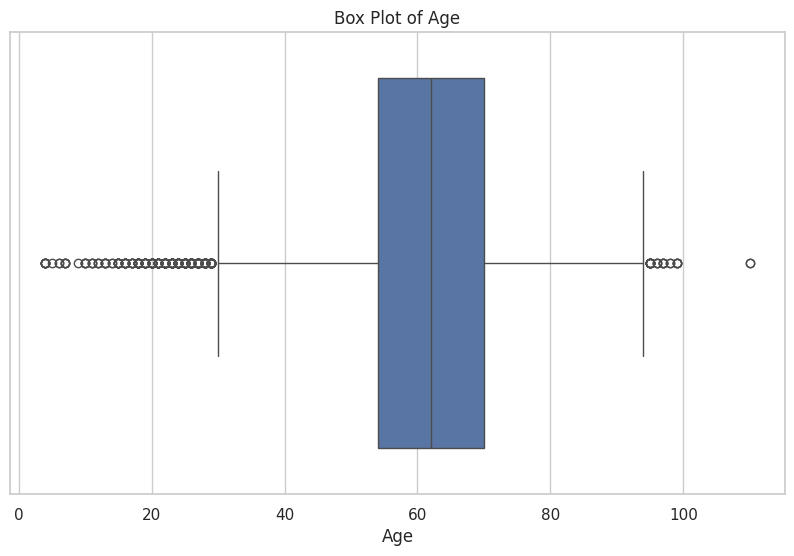

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Edad'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


In [ ]:
# prompt: eliminar outlier df3 edad

# Calculate the quartiles for 'Edad'
q1_edad = df3['Edad'].quantile(0.25)
q3_edad = df3['Edad'].quantile(0.75)
iqr_edad = q3_edad - q1_edad

# Define the lower and upper bounds for outliers
lower_bound_edad = q1_edad - 1.5 * iqr_edad
upper_bound_edad = q3_edad + 1.5 * iqr_edad

# Identify outliers
outliers_edad = df3[(df3['Edad'] < lower_bound_edad) | (df3['Edad'] > upper_bound_edad)]

# Remove outliers
df3 = df3[(df3['Edad'] >= lower_bound_edad) & (df3['Edad'] <= upper_bound_edad)]

# Print the number of outliers removed
print(f"Number of outliers in 'Edad' removed: {len(outliers_edad)}")


Number of outliers in 'Edad' removed: 240


In [ ]:

# le = LabelEncoder() Género Residencia Tipo de Admision

le = LabelEncoder()

for column in ['Género', 'Residencia', 'Tipo de Admisión','Motivo de Alta']:
    df3[column] = le.fit_transform(df3[column])

<ipython-input-522-fc29d32331fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column] = le.fit_transform(df3[column])
<ipython-input-522-fc29d32331fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column] = le.fit_transform(df3[column])
<ipython-input-522-fc29d32331fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:


# Crear el scaler
scaler = StandardScaler()

# Seleccionamos solo las columnas numéricas
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Estandarizar todas las columnas numéricas
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])

# Ver los resultados
df3.head()

<ipython-input-523-a6e3d439d310>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])


Edad    Género  Residencia  Tipo de Admisión  Duración Estadia  \
ADMISION                                                                       
1         1.545327  0.755423   -1.789725         -0.661987         -0.808428   
2         0.249499  0.755423   -1.789725         -0.661987         -0.186823   
3        -0.722373  0.755423    0.558745         -0.661987         -0.808428   
4         0.411477 -1.323762    0.558745         -0.661987          0.745586   
6        -1.451276  0.755423    0.558745         -0.661987          1.367191   

          Duración Estadia unidad intensiva  Motivo de Alta   Fumador  \
ADMISION                                                                
1                                 -0.454423       -0.049227 -0.237431   
2                                 -0.454423       -0.049227 -0.237431   
3                                 -0.104416       -0.049227 -0.237431   
4                                  0.945606       -0.049227 -0.237431   
6                                  1.645620       -0.049227 -0.237431   

           Alcohol  Diabetes Mellitus  ...  Infección del Tracto Urinario  \
ADMISION                               ...                                  
1        -0.270988           1.419734  ...                      -0.250895   
2         3.690197          -0.704357  ...                      -0.250895   
3        -0.270988           1.419734  ...                      -0.250895   
4        -0.270988          -0.704357  ...                      -0.250895   
6        -0.270988           1.419734  ...                      -0.250895   

          Síncope Neurocardiogénico  Ortostático  Endocarditis Infecciosa  \
ADMISION                                                                    
1                         -0.094731    -0.088563                -0.034457   
2                         -0.094731    -0.088563                -0.034457   
3                         -0.094731    -0.088563                -0.034457   
4                         -0.094731    -0.088563                -0.034457   
6                         -0.094731    -0.088563                -0.034457   

          Trombosis Venosa Profunda  Choque Cardiogénico     Shock  \
ADMISION                                                             
1                         -0.112964            -0.256357 -0.224796   
2                         -0.112964            -0.256357 -0.224796   
3                         -0.112964            -0.256357 -0.224796   
4                         -0.112964            -0.256357 -0.224796   
6                         -0.112964            -0.256357 -0.224796   

          Embolia Pulmonar  Infección Torácica  REINGRESO  
ADMISION                                                   
1                -0.120784                   0         No  
2                -0.120784                   0         No  
3                -0.120784                   0         No  
4                -0.120784                   0         No  
6                -0.120784                   0         No  

[5 rows x 43 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13492 entries, 1 to 15756
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Edad                                                      13492 non-null  float64
 1   Género                                                    13492 non-null  float64
 2   Residencia                                                13492 non-null  float64
 3   Tipo de Admisión                                          13492 non-null  float64
 4   Duración Estadia                                          13492 non-null  float64
 5   Duración Estadia unidad intensiva                         13492 non-null  float64
 6   Motivo de Alta                                            13492 non-null  float64
 7   Fumador                                                   13492 non-null  float64
 8   Alcohol              

In [ ]:
# Convert the column to integers
df3['Infección Torácica'] = df3['Infección Torácica'].astype(int)


In [ ]:
X = df3.drop(['Motivo de Alta', 'Duración Estadia','Duración Estadia unidad intensiva','REINGRESO','Infección Torácica' ], axis=1)
y= df3['Duración Estadia']


In [ ]:
df3.drop(['Motivo de Alta', 'Duración Estadia unidad intensiva','REINGRESO','Infección Torácica' ], axis=1)

Edad    Género  Residencia  Tipo de Admisión  Duración Estadia  \
ADMISION                                                                       
1         1.545327  0.755423   -1.789725         -0.661987         -0.808428   
2         0.249499  0.755423   -1.789725         -0.661987         -0.186823   
3        -0.722373  0.755423    0.558745         -0.661987         -0.808428   
4         0.411477 -1.323762    0.558745         -0.661987          0.745586   
6        -1.451276  0.755423    0.558745         -0.661987          1.367191   
...            ...       ...         ...               ...               ...   
15752    -0.155448 -1.323762    0.558745         -0.661987          1.056388   
15753     1.950274 -1.323762    0.558745          1.510605         -0.186823   
15754    -0.965340  0.755423   -1.789725         -0.661987         -1.119231   
15755     1.626317  0.755423    0.558745         -0.661987          1.367191   
15756    -0.236437 -1.323762    0.558745          1.510605         -0.497625   

           Fumador   Alcohol  Diabetes Mellitus  Hipertensión  \
ADMISION                                                        
1        -0.237431 -0.270988           1.419734     -0.980475   
2        -0.237431  3.690197          -0.704357      1.019914   
3        -0.237431 -0.270988           1.419734     -0.980475   
4        -0.237431 -0.270988          -0.704357      1.019914   
6        -0.237431 -0.270988           1.419734      1.019914   
...            ...       ...                ...           ...   
15752    -0.237431 -0.270988          -0.704357     -0.980475   
15753    -0.237431 -0.270988           1.419734      1.019914   
15754    -0.237431 -0.270988           1.419734      1.019914   
15755    -0.237431 -0.270988          -0.704357      1.019914   
15756    -0.237431 -0.270988          -0.704357      1.019914   

          Enfermedad Coronaria Arterial  ...  \
ADMISION                                 ...   
1                             -1.446012  ...   
2                              0.691557  ...   
3                              0.691557  ...   
4                              0.691557  ...   
6                              0.691557  ...   
...                                 ...  ...   
15752                          0.691557  ...   
15753                          0.691557  ...   
15754                         -1.446012  ...   
15755                          0.691557  ...   
15756                          0.691557  ...   

          Taquicardia Supraventricular Paroxística  Cardiopatía Congénita  \
ADMISION                                                                    
1                                        -0.087279              -0.093529   
2                                        -0.087279              -0.093529   
3                                        -0.087279              -0.093529   
4                                        -0.087279              -0.093529   
6                                        -0.087279              -0.093529   
...                                            ...                    ...   
15752                                    -0.087279              -0.093529   
15753                                    -0.087279              -0.093529   
15754                                    -0.087279              -0.093529   
15755                                    -0.087279              -0.093529   
15756                                    -0.087279              -0.093529   

          Infección del Tracto Urinario  Síncope Neurocardiogénico  \
ADMISION                                                             
1                             -0.250895                  -0.094731   
2                             -0.250895                  -0.094731   
3                             -0.250895                  -0.094731   
4                             -0.250895                  -0.094731   
6                             -0.250895                  -0.094731   
...       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=0.8, random_state=42)

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R^2:", r2_score(y_test, lr_pred))

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))
print("Decision Tree R^2:", r2_score(y_test, dt_pred))

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R^2:", r2_score(y_test, rf_pred))

# XGBoost Regressor

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("XGBoost R^2:", r2_score(y_test, xgb_pred))

# LightGBM Regressor

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM MSE:", mean_squared_error(y_test, lgb_pred))
print("LightGBM R^2:", r2_score(y_test, lgb_pred))


Linear Regression MSE: 0.8428457257485836
Linear Regression R^2: 0.12074591079294528
Decision Tree MSE: 1.6929099461015202
Decision Tree R^2: -0.7660384899585615
Random Forest MSE: 0.9560026849423057
Random Forest R^2: 0.00270091625382074
XGBoost MSE: 0.8921095458109607
XGBoost R^2: 0.06935404402950585
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 10793, number of used features: 37
[LightGBM] [Info] Start training from score 0.002832
LightGBM MSE: 0.8373881393715631
LightGBM R^2: 0.12643924824795116


In [ ]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9483 - mae: 0.7634 - val_loss: 0.8843 - val_mae: 0.7243
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8453 - mae: 0.7179 - val_loss: 0.8738 - val_mae: 0.7153
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8165 - mae: 0.7030 - val_loss: 0.8529 - val_mae: 0.7197
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8238 - mae: 0.7127 - val_loss: 0.8607 - val_mae: 0.7145
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7767 - mae: 0.6836 - val_loss: 0.8561 - val_mae: 0.7162
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8054 - mae: 0.7010 - val_loss: 0.8770 - val_mae: 0.7143
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7796 - mae: 0.6872 - val_loss: 0.8690 - val_mae: 0.7231
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7498 - mae: 0.6721 - val_loss: 0.8682 - val_mae: 0.7160
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7406 

Mean Absolute Error: 0.8040673136711121
R-squared: -0.1754161202826121


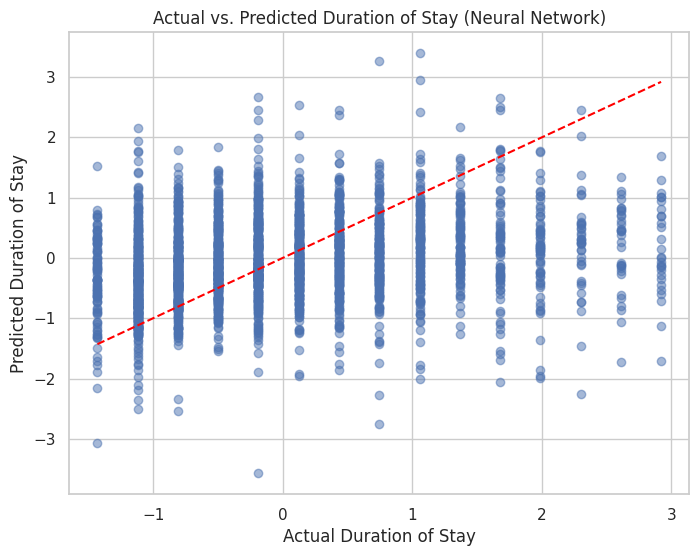

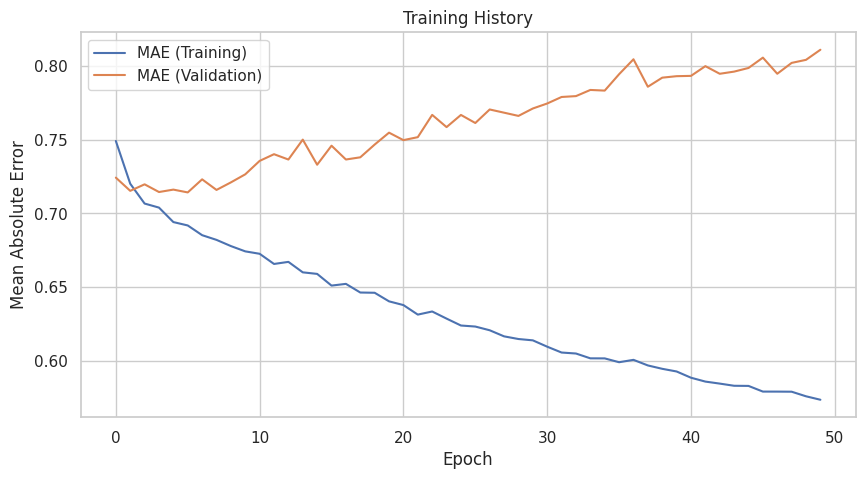

In [ ]:
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Duration of Stay")
plt.ylabel("Predicted Duration of Stay")
plt.title("Actual vs. Predicted Duration of Stay (Neural Network)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Add a diagonal line
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='MAE (Training)')
plt.plot(history.history['val_mae'], label='MAE (Validation)')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.title("Training History")
plt.legend()
plt.show()


In [ ]:
print(r2)

-0.1754161202826121


## MODELO 3: ESTIMACIÓN DE DIAS DE ESTADIA - ESTEFANIA

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Edad                                                      14399 non-null  int64 
 1   Género                                                    14399 non-null  object
 2   Residencia                                                14399 non-null  object
 3   Tipo de Admisión                                          14399 non-null  object
 4   Duración Estadia                                          14399 non-null  int64 
 5   Duración Estadia unidad intensiva                         14399 non-null  int64 
 6   Motivo de Alta                                            14399 non-null  object
 7   Fumador                                                   14399 non-null  int64 
 8   Alcohol                        

In [ ]:
df3= df2.copy()

In [ ]:
df3 = df3.drop(columns=['Duración Estadia unidad intensiva','Motivo de Alta'])


In [ ]:
# Asignar valores numéricos directamente con operaciones matemáticas
df3['Tipo de Insuficiencia Cardíaca'] = (
    (df3['Insuficiencia Cardíaca con Fracción de Eyección Normal'] * 1) +
    (df3['Insuficiencia Cardíaca con Fracción de Eyección Reducida'] * 2) +
    ((df3['Insuficiencia Cardíaca'] == 1) &
     (df3['Insuficiencia Cardíaca con Fracción de Eyección Normal'] == 1) &
     (df3['Insuficiencia Cardíaca con Fracción de Eyección Reducida'] == 1)) * 3
)

# Eliminar columnas originales
df3.drop(columns=[
    'Insuficiencia Cardíaca',
    'Insuficiencia Cardíaca con Fracción de Eyección Reducida',
    'Insuficiencia Cardíaca con Fracción de Eyección Normal'
], inplace=True)


In [ ]:
#Corresponde a valor 0 sin anema, 1 con anemia, 2 anemia severa
df3['Tipo_Anemia'] = df3['Anemia'] + (df3['Anemia Severa'] * 2)
df3.drop(columns=['Anemia', 'Anemia Severa'], inplace=True)


In [ ]:
#Corresponde a 0 = Sin ACV, 1 = Isquémico, 2 = Hemorrágico).
df3['ACV_Tipo'] = (df3['Accidente Cerebrovascular Isquémico'] * 1) + (df3['Accidente Cerebrovascular Hemorrágico'] * 2)
df3.drop(columns=['Accidente Cerebrovascular Isquémico', 'Accidente Cerebrovascular Hemorrágico','REINGRESO'], inplace=True)


In [ ]:
#1 si tiene alguna, 0 si no tiene
df3['Presencia_Taquiarritmia'] = df3[['Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística']].max(axis=1)
df3.drop(columns=['Taquicardia Ventricular', 'Taquicardia Supraventricular Paroxística'], inplace=True)


In [ ]:
 #0 = Ninguno, 1 = Angina, 2 = Síndrome Coronario Agudo, 3 = Infarto STEMI.
df3['Síndrome_Coronario'] = (
    (df3['Angina Estable'] * 1) +
    (df3['Síndrome Coronario Agudo'] * 2) +
    (df3['Infarto de Miocardio(STEMI)'] * 3)
)
df3.drop(columns=['Síndrome Coronario Agudo', 'Infarto de Miocardio(STEMI)', 'Angina Estable'], inplace=True)


In [ ]:
#0 = Ninguno, 1 = Shock no cardiogénico, 2 = Choque Cardiogénico
df3['Tipo_Shock'] = (df3['Shock'] * 1) + (df3['Choque Cardiogénico'] * 2)
df3.drop(columns=['Shock', 'Choque Cardiogénico'], inplace=True)


In [ ]:
#0  No tiene ninguna
#1  Trombosis Venosa Profunda
#2  Embolia Pulmonar
#3  Ambas enfermedades

# Crear la variable Enfermedad_Tromboembólica con la clasificación correcta
df3['Enfermedad_Tromboembólica'] = (df3['Trombosis Venosa Profunda'] * 1) + (df3['Embolia Pulmonar'] * 2)

# Eliminar las columnas originales
df3.drop(columns=['Trombosis Venosa Profunda', 'Embolia Pulmonar'], inplace=True)


In [ ]:
#1 si tiene alguna, 0 si no tiene
df3['Cardiopatía_Estructural'] = df3[['Enfermedad Valvular Cardíaca', 'Miocardiopatía', 'Bloqueo Cardíaco Completo', 'Síndrome del Nodo Sinusal Enfermo']].max(axis=1)
df3.drop(columns=['Enfermedad Valvular Cardíaca', 'Miocardiopatía', 'Bloqueo Cardíaco Completo', 'Síndrome del Nodo Sinusal Enfermo'], inplace=True)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 1 to 15756
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Edad                            14399 non-null  int64 
 1   Género                          14399 non-null  object
 2   Residencia                      14399 non-null  object
 3   Tipo de Admisión                14399 non-null  object
 4   Duración Estadia                14399 non-null  int64 
 5   Fumador                         14399 non-null  int64 
 6   Alcohol                         14399 non-null  int64 
 7   Diabetes Mellitus               14399 non-null  int64 
 8   Hipertensión                    14399 non-null  int64 
 9   Enfermedad Coronaria Arterial   14399 non-null  int64 
 10  Enfermedad Renal Crónica        14399 non-null  int64 
 11  Dolor Torácico Atípico          14399 non-null  int64 
 12  Lesión Renal Aguda              14399 non-null  int

In [ ]:
#0  Ninguno, 1 Fumador, 2  Alcohol,3  Ambos

# Crear variable Factores de Riesgo con los valores especificados
df3['Factores_Riesgo'] = (df3['Fumador'] * 1) + (df3['Alcohol'] * 2)
df3.drop(columns=['Fumador', 'Alcohol'], inplace=True)

In [ ]:
df3.columns

Index(['Edad', 'Género', 'Residencia', 'Tipo de Admisión', 'Duración Estadia',
       'Diabetes Mellitus', 'Hipertensión', 'Enfermedad Coronaria Arterial',
       'Enfermedad Renal Crónica', 'Dolor Torácico Atípico',
       'Lesión Renal Aguda', 'Fibrilación Auricular', 'Cardiopatía Congénita',
       'Infección del Tracto Urinario', 'Síncope Neurocardiogénico',
       'Ortostático', 'Endocarditis Infecciosa', 'Infección Torácica',
       'Tipo de Insuficiencia Cardíaca', 'Tipo_Anemia', 'ACV_Tipo',
       'Presencia_Taquiarritmia', 'Síndrome_Coronario', 'Tipo_Shock',
       'Enfermedad_Tromboembólica', 'Cardiopatía_Estructural',
       'Factores_Riesgo'],
      dtype='object')

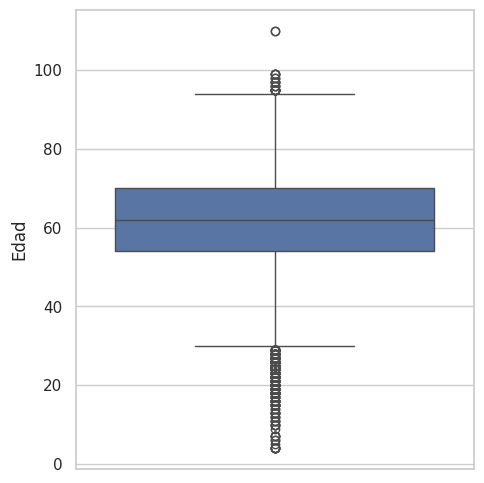

In [ ]:
#conocer los outlier a traves de boxplot

fig, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(ax=axis, data=df3, y= 'Edad')

plt.tight_layout()
plt.show()

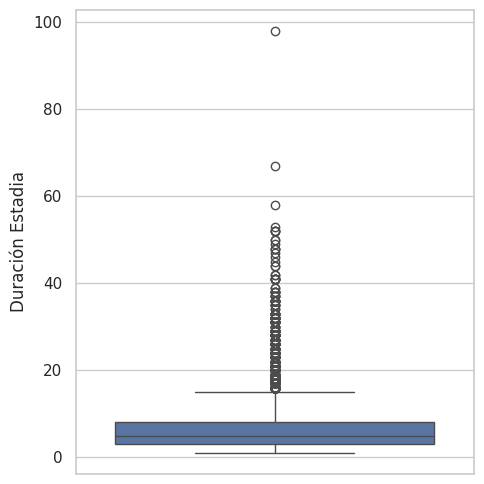

In [ ]:
#conocer los outlier a traves de boxplot

fig, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(ax=axis, data=df3, y= 'Duración Estadia')

plt.tight_layout()
plt.show()

In [ ]:
df3['Duración Estadia'].max()


98

In [ ]:
df3[df3['Edad']>=100].count()

Edad                              2
Género                            2
Residencia                        2
Tipo de Admisión                  2
Duración Estadia                  2
Diabetes Mellitus                 2
Hipertensión                      2
Enfermedad Coronaria Arterial     2
Enfermedad Renal Crónica          2
Dolor Torácico Atípico            2
Lesión Renal Aguda                2
Fibrilación Auricular             2
Cardiopatía Congénita             2
Infección del Tracto Urinario     2
Síncope Neurocardiogénico         2
Ortostático                       2
Endocarditis Infecciosa           2
Infección Torácica                2
Tipo de Insuficiencia Cardíaca    2
Tipo_Anemia                       2
ACV_Tipo                          2
Presencia_Taquiarritmia           2
Síndrome_Coronario                2
Tipo_Shock                        2
Enfermedad_Tromboembólica         2
Cardiopatía_Estructural           2
Factores_Riesgo                   2
dtype: int64

In [ ]:
df3[df3['Duración Estadia']>=55].count()

Edad                              3
Género                            3
Residencia                        3
Tipo de Admisión                  3
Duración Estadia                  3
Diabetes Mellitus                 3
Hipertensión                      3
Enfermedad Coronaria Arterial     3
Enfermedad Renal Crónica          3
Dolor Torácico Atípico            3
Lesión Renal Aguda                3
Fibrilación Auricular             3
Cardiopatía Congénita             3
Infección del Tracto Urinario     3
Síncope Neurocardiogénico         3
Ortostático                       3
Endocarditis Infecciosa           3
Infección Torácica                3
Tipo de Insuficiencia Cardíaca    3
Tipo_Anemia                       3
ACV_Tipo                          3
Presencia_Taquiarritmia           3
Síndrome_Coronario                3
Tipo_Shock                        3
Enfermedad_Tromboembólica         3
Cardiopatía_Estructural           3
Factores_Riesgo                   3
dtype: int64

In [ ]:
#Eliminar outlier, solo quedaran las personas que tienen 100 y menos años
df3 = df3[df3['Edad']<=100]

In [ ]:
#Eliminar outlier, solo quedaran las personas que tienen 30 y menos días en su estadia
df3 = df3[df3['Duración Estadia']<=30]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14314 entries, 1 to 15756
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Edad                            14314 non-null  int64 
 1   Género                          14314 non-null  object
 2   Residencia                      14314 non-null  object
 3   Tipo de Admisión                14314 non-null  object
 4   Duración Estadia                14314 non-null  int64 
 5   Diabetes Mellitus               14314 non-null  int64 
 6   Hipertensión                    14314 non-null  int64 
 7   Enfermedad Coronaria Arterial   14314 non-null  int64 
 8   Enfermedad Renal Crónica        14314 non-null  int64 
 9   Dolor Torácico Atípico          14314 non-null  int64 
 10  Lesión Renal Aguda              14314 non-null  int64 
 11  Fibrilación Auricular           14314 non-null  int64 
 12  Cardiopatía Congénita           14314 non-null  int

In [ ]:
# Convertir solo las columnas numéricas que están como object
for col in df3.select_dtypes(include=['object']).columns:
    # Verificar si la columna es completamente numérica antes de convertir
    if df3[col].str.isnumeric().all():
        df3[col] = df3[col].astype(int)

print(df3.dtypes)  # Verificar los tipos de datos después de la conversión

Edad                               int64
Género                            object
Residencia                        object
Tipo de Admisión                  object
Duración Estadia                   int64
Diabetes Mellitus                  int64
Hipertensión                       int64
Enfermedad Coronaria Arterial      int64
Enfermedad Renal Crónica           int64
Dolor Torácico Atípico             int64
Lesión Renal Aguda                 int64
Fibrilación Auricular              int64
Cardiopatía Congénita              int64
Infección del Tracto Urinario      int64
Síncope Neurocardiogénico          int64
Ortostático                        int64
Endocarditis Infecciosa            int64
Infección Torácica                 int64
Tipo de Insuficiencia Cardíaca     int64
Tipo_Anemia                        int64
ACV_Tipo                           int64
Presencia_Taquiarritmia            int64
Síndrome_Coronario                 int64
Tipo_Shock                         int64
Enfermedad_Tromb

In [ ]:
for col in df3.select_dtypes(include=['object']).columns:
    df3[col], _ = pd.factorize(df3[col])

MODELO

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear el scaler
scaler = StandardScaler()

# Seleccionamos solo las columnas numéricas
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Estandarizar todas las columnas numéricas
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])

# Ver los resultados
df3.head()

Edad    Género  Residencia  Tipo de Admisión  Duración Estadia  \
ADMISION                                                                       
1         1.463799 -0.761061   -1.783735         -0.653325         -0.739017   
2         0.269902 -0.761061   -1.783735         -0.653325         -0.274599   
3        -0.625521 -0.761061    0.560621         -0.653325         -0.739017   
4         0.419139  1.313954    0.560621         -0.653325          0.422029   
5        -0.103191  1.313954    0.560621         -0.653325          3.905166   

          Diabetes Mellitus  Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                                   
1                  1.424351     -0.970262                      -1.416068   
2                 -0.702074      1.030650                       0.706181   
3                  1.424351     -0.970262                       0.706181   
4                 -0.702074      1.030650                       0.706181   
5                 -0.702074      1.030650                      -1.416068   

          Enfermedad Renal Crónica  Dolor Torácico Atípico  ...  \
ADMISION                                                    ...   
1                        -0.330688               -0.162895  ...   
2                        -0.330688               -0.162895  ...   
3                        -0.330688               -0.162895  ...   
4                        -0.330688               -0.162895  ...   
5                        -0.330688               -0.162895  ...   

          Infección Torácica  Tipo de Insuficiencia Cardíaca  Tipo_Anemia  \
ADMISION                                                                    
1                  -0.151942                        2.071769     1.493414   
2                  -0.151942                       -0.588973    -0.401518   
3                  -0.151942                        2.071769    -0.401518   
4                  -0.151942                       -0.588973    -0.401518   
5                  -0.151942                       -0.588973    -0.401518   

          ACV_Tipo  Presencia_Taquiarritmia  Síndrome_Coronario  Tipo_Shock  \
ADMISION                                                                      
1        -0.172541                -0.204947            0.434831   -0.270801   
2        -0.172541                 4.879306           -0.716407   -0.270801   
3        -0.172541                -0.204947           -0.716407   -0.270801   
4        -0.172541                -0.204947           -0.716407   -0.270801   
5        -0.172541                -0.204947           -0.716407   -0.270801   

          Enfermedad_Tromboembólica  Cardiopatía_Estructural  Factores_Riesgo  
ADMISION                                                                       
1                          -0.14492                -0.522094        -0.304843  
2                          -0.14492                -0.522094         2.984657  
3                          -0.14492                -0.522094        -0.304843  
4                          -0.14492                -0.522094        -0.304843  
5                          -0.14492                 1.915365        -0.304843  

[5 rows x 27 columns]

In [ ]:
import os

# Crear el directorio si no existe
os.makedirs('../data/processed/', exist_ok=True)

# Guardar el DataFrame
df3.to_csv('../data/processed/df3.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X = df3.drop("Duración Estadia", axis = 1)
y = df3["Duración Estadia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

Edad    Género  Residencia  Tipo de Admisión  Diabetes Mellitus  \
ADMISION                                                                        
3641     -0.476284  1.313954    0.560621         -0.653325           1.424351   
967      -1.446325 -0.761061    0.560621         -0.653325          -0.702074   
8400      0.941469  1.313954    0.560621         -0.653325          -0.702074   
10816     1.239944 -0.761061    0.560621         -0.653325          -0.702074   
2910     -0.103191 -0.761061   -1.783735         -0.653325          -0.702074   

          Hipertensión  Enfermedad Coronaria Arterial  \
ADMISION                                                
3641          1.030650                       0.706181   
967           1.030650                      -1.416068   
8400          1.030650                       0.706181   
10816         1.030650                       0.706181   
2910         -0.970262                       0.706181   

          Enfermedad Renal Crónica  Dolor Torácico Atípico  \
ADMISION                                                     
3641                     -0.330688               -0.162895   
967                      -0.330688               -0.162895   
8400                      3.024000               -0.162895   
10816                    -0.330688               -0.162895   
2910                     -0.330688               -0.162895   

          Lesión Renal Aguda  ...  Infección Torácica  \
ADMISION                      ...                       
3641               -0.537882  ...           -0.151942   
967                -0.537882  ...           -0.151942   
8400                1.859143  ...           -0.151942   
10816              -0.537882  ...           -0.151942   
2910               -0.537882  ...           -0.151942   

          Tipo de Insuficiencia Cardíaca  Tipo_Anemia  ACV_Tipo  \
ADMISION                                                          
3641                           -0.588973    -0.401518 -0.172541   
967                             0.741398    -0.401518 -0.172541   
8400                           -0.588973    -0.401518 -0.172541   
10816                           0.741398     1.493414 -0.172541   
2910                           -0.588973    -0.401518 -0.172541   

          Presencia_Taquiarritmia  Síndrome_Coronario  Tipo_Shock  \
ADMISION                                                            
3641                     4.879306            2.161688   -0.270801   
967                     -0.204947           -0.716407   -0.270801   
8400                    -0.204947           -0.716407   -0.270801   
10816                   -0.204947           -0.716407   -0.270801   
2910                    -0.204947            2.161688   -0.270801   

          Enfermedad_Tromboembólica  Cardiopatía_Estructural  Factores_Riesgo  
ADMISION                                                                       
3641                       -0.14492                -0.522094        -0.304843  
967                        -0.14492                -0.522094         2.984657  
8400                       -0.14492                 1.915365        -0.304843  
10816                      -0.14492                -0.522094        -0.304843  
2910                       -0.14492                 1.915365        -0.304843  

[5 rows x 26 columns]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

MSE: 1.0048089148342816
r2: -0.01084921883397616


In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [7, 9, 11],
    'min_samples_split': [3, 5, 7]
}

grid_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_best_pred)}")
print(f"r2: {r2_score(y_test, y_best_pred)}")

MSE: 0.8756741939983878
r2: 0.11906178190872274


<Axes: xlabel='Duración Estadia', ylabel='Count'>

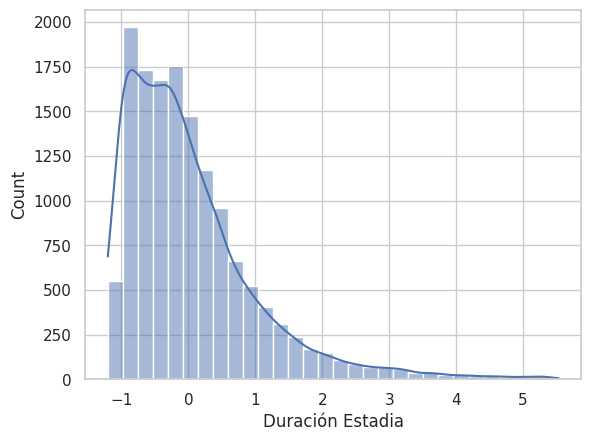

In [ ]:
import seaborn as sns
sns.histplot(df3['Duración Estadia'], bins=30, kde=True)


In [ ]:
# prompt: from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=200, learning_rate=0.05)
# model.fit(X_train, y_train)

from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is in a DataFrame called 'df3' and you have already preprocessed it.
# If 'df3' is not defined, load your data:

# Example loading data from a CSV file
# df3 = pd.read_csv('your_data_file.csv')

# Define features (X) and target variable (y)
X = df3.drop("Duración Estadia", axis=1)
y = df3["Duración Estadia"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=200, learning_rate=0.05)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.8832385837448719
R-squared (R2): 0.11145191962217016


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 0.88
RMSE: 0.94
MAE: 0.67
R²: 0.11


In [ ]:
# prompt: pip uninstall -y scikit-learn xgboost
# pip install --no-cache-dir scikit-learn xgboost
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_score
# # Realizar validación cruzada con el modelo de regresión
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# # Promediar los resultados de la validación cruzada
# print(f'Validación cruzada MSE promedio: {-cv_scores.mean():.2f}')

!pip uninstall -y scikit-learn xgboost
!pip install --no-cache-dir scikit-learn xgboost
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming 'model', 'X_train', and 'y_train' are defined
# Realizar validación cruzada con el modelo de regresión
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Promediar los resultados de la validación cruzada
print(f'Validación cruzada MSE promedio: {-cv_scores.mean():.2f}')


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 230.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 149.9 MB/s eta 0:00:00


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

In [ ]:
from xgboost import XGBRegressor

# Inicializamos el modelo con los mejores parámetros
model = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=300)

# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluación de las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

In [ ]:
import matplotlib.pyplot as plt

# Graficar los errores (residuos)
errors = y_pred - y_test
plt.hist(errors, bins=50)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Línea de 45 grados
plt.title("Predicción vs. Real")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear el scaler
scaler = StandardScaler()

# Seleccionamos solo las columnas numéricas
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Estandarizar todas las columnas numéricas
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])

# Ver los resultados
df3.head()

In [ ]:
# prompt: El modelo no es bueno estimando por lo cual se exploraran otras alaternativa mejorar readacion

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Assuming 'model', 'X_train', and 'y_train' are defined from previous code
# and 'X_test', 'y_test' as well


# Realizar validación cruzada con el modelo de regresión
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Promediar los resultados de la validación cruzada
print(f'Validación cruzada MSE promedio: {-cv_scores.mean():.2f}')


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

# Inicializamos el modelo con los mejores parámetros
best_xgb_model = grid_search.best_estimator_ # Use the best estimator from GridSearchCV

# Ajustamos el modelo con los datos de entrenamiento (already done in grid_search)
# best_xgb_model.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = best_xgb_model.predict(X_test)

# Evaluación de las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

# Graficar los errores (residuos)
errors = y_pred - y_test
plt.hist(errors, bins=50)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Línea de 45 grados
plt.title("Predicción vs. Real")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.show()


El modelo actual no logra estimar con precisión la duración de la estadia, por lo que se explorarán otras alternativas.

